By http://www.cboe.com/products/indexcomponents.aspx, I fetch all of components of S&P100 and analyze using its subests.


In [4]:
!pip install matplotlib --upgrade
!pip install quandl --upgrade
!pip install yahoo-finance --upgrade

#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share



def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        return_data.append(d[key])
        
    return np.array(return_data)

def get_data_by_list(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: numpy>=1.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: python-dateutil in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: cycler in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,>=1.5.6 in /usr/local/lib/python2.7/dist-packages (from matplotlib)
Cleaning up...
Requirement already up-to-date: quandl in /usr/local/lib/python2.7/dist-packages
Cleaning up...
Requirement already up-to-date: yahoo-finance in /usr/local/lib/python2.7/dist-packages
Requirement already up-to-date: pytz in /usr/local/lib/python2.7/dist-packages (from yahoo-finance)
Requirement already up-to-date: simplejson in /usr/local/lib/python2.7/dist-packages (from y

In [11]:
input_list = ["MMM", "T",  "ABBV", "ABT", "ACN", "AGN", "ALL", "GOOGL", "GOOG",
              "MO", "AMZN", "AXP", "AIG", "AMGN", "AAPL", "BAC", "BRK.B", "BIIB", "BLK",
              "BA", "BMY", "CVS", "COF", "CAT", "CELG", "CVX", "CSCO",  "C", "KO", "CL", 
              "CMCSA", "COP", "COST", "DHR", "DOW", "DUK", "DD", "EMC", "EMR", "EXC",
              "XOM", "FB", "FDX", "F", "GD", "GE", "GM", "GILD", "GS", "HAL", "HD", "HON", 
              "INTC", "IBM", "JPM", "JNJ", "KMI", "LLY", "LMT", "LOW", "MA", "MCD", "MDT",
              "MRK", "MET", "MSFT", "MDLZ", "MON", "MS", "NKE", "NEE", "OXY", "ORCL", 
              "PYPL", "PEP", "PFE", "PM", "PG", "QCOM", "RTN", "SLB", "SPG", "SO", "SBUX", 
              "TGT", "TXN", "BK", "PCLN", "TWX", "FOXA", "FOX", "USB", "UNP", "UPS", 
              "UTX", "UNH", "VZ", "V", "WMT", "WBA", "DIS", "WFC"]

In [5]:
import time
print ("Start!!")

st = time.time()
start_date="2014-06-01"
end_date="2016-06-01"
input_data, date, input_list = get_data_by_list(input_list, start_date=start_date, end_date=end_date) 
sp = quandl.get("YAHOO/INDEX_OEX", start_date=start_date, end_date=end_date)
target_data = np.array(sp['Open'])
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  ['BRK.B', 'NEE']
time for getting training_data: 390.87432003


### Fix data

In [20]:
fail_list = ["BRK.B", "NEE"]
fail_index = []
input_data_tilde = input_data.copy()
for name in iter(fail_list):
    index = input_list.index(name)
    input_data_tilde = np.delete(input_data_tilde, index, 0)
    del input_list[index]

data_list = []
for data in iter(input_data_tilde):
    data_list.append(data)
data = np.array(data_list)

ValueError: 'BRK.B' is not in list

In [14]:
print (input_list)

['MMM', 'T', 'ABBV', 'ABT', 'ACN', 'AGN', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AXP', 'AIG', 'AMGN', 'AAPL', 'BAC', 'BIIB', 'BLK', 'BA', 'BMY', 'CVS', 'COF', 'CAT', 'CELG', 'CVX', 'CSCO', 'C', 'KO', 'CL', 'CMCSA', 'COP', 'COST', 'DHR', 'DOW', 'DUK', 'DD', 'EMC', 'EMR', 'EXC', 'XOM', 'FB', 'FDX', 'F', 'GD', 'GE', 'GM', 'GILD', 'GS', 'HAL', 'HD', 'HON', 'INTC', 'IBM', 'JPM', 'JNJ', 'KMI', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDT', 'MRK', 'MET', 'MSFT', 'MDLZ', 'MON', 'MS', 'NKE', 'OXY', 'ORCL', 'PYPL', 'PEP', 'PFE', 'PM', 'PG', 'QCOM', 'RTN', 'SLB', 'SPG', 'SO', 'SBUX', 'TGT', 'TXN', 'BK', 'PCLN', 'TWX', 'FOXA', 'FOX', 'USB', 'UNP', 'UPS', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA', 'DIS', 'WFC']


In [15]:
length = len(input_data_tilde[0])
for i in xrange(len(input_data_tilde)):
    if length != len(input_data_tilde[i]):
        print (i)

71


In [16]:
print (input_list[71])

PYPL


In [17]:
del input_list[71]
input_data_tilde = np.delete(input_data_tilde, 71, 0)

data_list = []
for data in iter(input_data_tilde):
    data_list.append(data)
data = np.array(data_list)

In [18]:
print (data.shape)

(99, 505)


In [19]:
print (input_list)

['MMM', 'T', 'ABBV', 'ABT', 'ACN', 'AGN', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AXP', 'AIG', 'AMGN', 'AAPL', 'BAC', 'BIIB', 'BLK', 'BA', 'BMY', 'CVS', 'COF', 'CAT', 'CELG', 'CVX', 'CSCO', 'C', 'KO', 'CL', 'CMCSA', 'COP', 'COST', 'DHR', 'DOW', 'DUK', 'DD', 'EMC', 'EMR', 'EXC', 'XOM', 'FB', 'FDX', 'F', 'GD', 'GE', 'GM', 'GILD', 'GS', 'HAL', 'HD', 'HON', 'INTC', 'IBM', 'JPM', 'JNJ', 'KMI', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDT', 'MRK', 'MET', 'MSFT', 'MDLZ', 'MON', 'MS', 'NKE', 'OXY', 'ORCL', 'PEP', 'PFE', 'PM', 'PG', 'QCOM', 'RTN', 'SLB', 'SPG', 'SO', 'SBUX', 'TGT', 'TXN', 'BK', 'PCLN', 'TWX', 'FOXA', 'FOX', 'USB', 'UNP', 'UPS', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA', 'DIS', 'WFC']


In [23]:
target_data = np.atleast_2d(target_data).T
print (target_data.shape)

input_data = data.T
print (input_data.shape)

(505, 1)
(505, 99)


I suceeded to fetch almost all of data(99/100) used for S&P100.

First of all, I will try simple regression to see how we can estimate weights of each stock data in S&P100.

# Regression

start!
learning_time: 0.00868988037109


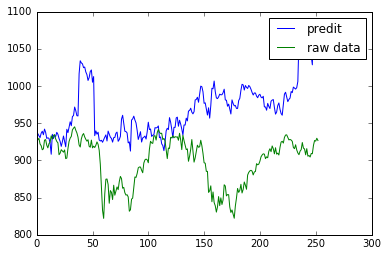

In [38]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

# plt.ylim(min(target_pred), max(target_pred))

plt.legend()

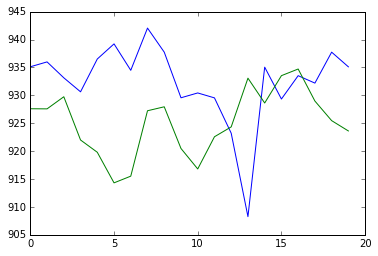

In [40]:
plt.plot(pred[:20], label="predit")
plt.plot(target_pred[:20], label="raw data")

In [27]:
df_input = input_data[1:] / input_data[:-1] - 1.0
df_target = target_data[1:] / target_data[:-1] -1.0

start!
learning_time: 0.00886201858521
loss: 0.000340800549834


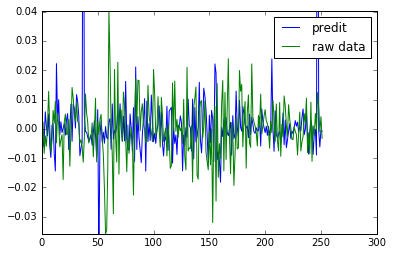

In [36]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred[:, 0] - target_pred[:, 0])))

plt.ylim(min(target_pred), max(target_pred))

plt.legend()

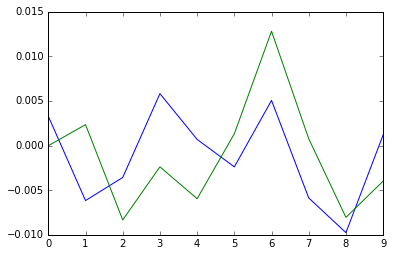

In [37]:
plt.plot(pred[:10], label="predit")
plt.plot(target_pred[:10], label="raw data")

you can see how drastically weight change along with time.

# MLP

In [42]:
import tensorflow as tf

In [52]:
class MLP(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]])
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                z = tf.matmul(x, W) + b
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                normalized_z = self.batch_normalization(z, shape)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[])
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(self._learning_rate)
        self.train = optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape):
        # input should be hidden_dim
        eps = 1e-5
        gamma = tf.Variable(tf.constant(1.0, shape=shape))
        beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        self.init_op = tf.initialize_all_variables()
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

        with tf.Session() as sess:
            sess.run(self.init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
                    
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # sess.run(self.init_op)
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
loss: 0.00684675
change learning rate 0.05
loss: 4.09688e-05
change learning rate 0.025
loss: 2.06952e-05
change learning rate 0.0125
loss: 2.3996e-05
change learning rate 0.00625
loss: 2.33506e-05
change learning rate 0.003125
loss: 2.36539e-05
change learning rate 0.0015625
loss: 2.37368e-05
change learning rate 0.00078125
loss: 2.35936e-05
change learning rate 0.000390625
loss: 2.36017e-05
change learning rate 0.0001953125
loss: 2.35972e-05
change learning rate 9.765625e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 122.685890198
Model restored.


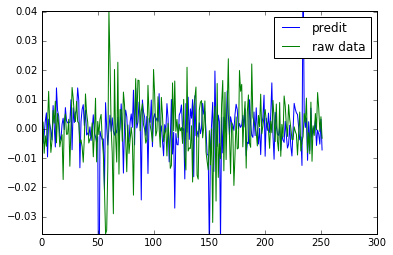

In [44]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=0.1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [45]:
print ("loss:", np.mean(np.square(pred - target_pred)))

loss: 0.00019494773975


loss: 6.57188519631e-05
loss: 5.94243259609e-05
loss: 8.3534825393e-05


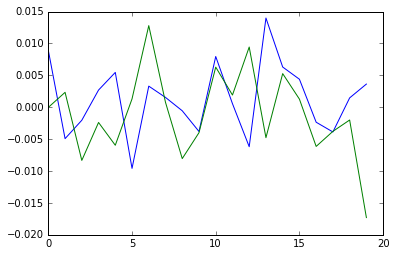

In [50]:
plt.plot(pred[:20], label="predit")
plt.plot(target_pred[:20], label="raw data")
print ("loss:", np.mean(np.square(pred[:5] - target_pred[:5])))
print ("loss:", np.mean(np.square(pred[:10] - target_pred[:10])))
print ("loss:", np.mean(np.square(pred[:20] - target_pred[:20])))

In [47]:
print (np.mean(np.square(target_pred)))

0.000102108126894


start!
loss: 0.0350887
change learning rate 0.01
loss: 5.04766e-05
change learning rate 0.003486784401
loss: 3.96054e-05
change learning rate 0.00121576654591
loss: 3.94281e-05
change learning rate 0.000423911582752
loss: 3.93027e-05
change learning rate 0.000147808829414
loss: 3.92965e-05
change learning rate 5.15377520732e-05
loss: 3.93023e-05
change learning rate 1.79701029991e-05
loss: 3.92985e-05
change learning rate 6.26578748218e-06
loss: 3.92979e-05
change learning rate 2.18474500528e-06
loss: 3.92982e-05
change learning rate 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 122.330742121
Model restored.
loss: 0.000423965620251


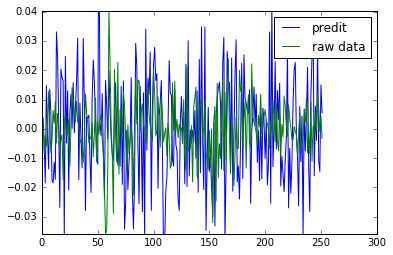

In [54]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

loss: 1.17254025796e-05
loss: 0.000196131014838
loss: 0.000390671075104


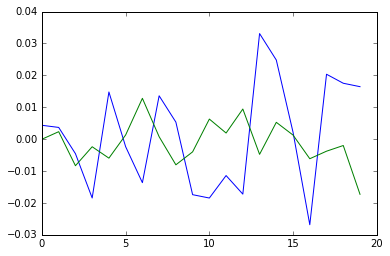

In [57]:
plt.plot(pred[:20], label="predit")
plt.plot(target_pred[:20], label="raw data")
print ("loss:", np.mean(np.square(pred[:3] - target_pred[:3])))
print ("loss:", np.mean(np.square(pred[:10] - target_pred[:10])))
print ("loss:", np.mean(np.square(pred[:20] - target_pred[:20])))

start!
loss: 797236.0
change learning rate 0.01
loss: 83300.0
change learning rate 0.003486784401
loss: 8599.62
change learning rate 0.00121576654591
loss: 1268.84
change learning rate 0.000423911582752
loss: 730.681
change learning rate 0.000147808829414
loss: 676.403
change learning rate 5.15377520732e-05
loss: 664.574
change learning rate 1.79701029991e-05
loss: 662.652
change learning rate 6.26578748218e-06
loss: 662.652
change learning rate 2.18474500528e-06
loss: 662.652
change learning rate 7.61773480459e-07
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 134.66034317
Model restored.
loss: 1168.68546173


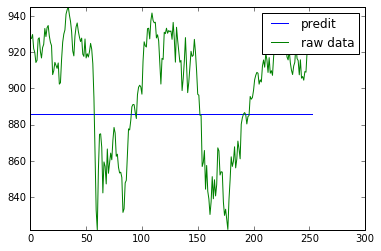

In [58]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 786214.0
change learning rate 0.1
loss: 2188.74
change learning rate 0.03486784401
loss: 2022.62
change learning rate 0.0121576654591
loss: 2087.23
change learning rate 0.00423911582752
loss: 2115.28
change learning rate 0.00147808829414
loss: 2115.33
change learning rate 0.000515377520732
loss: 2114.17
change learning rate 0.000179701029991
loss: 2113.3
change learning rate 6.26578748218e-05
loss: 2113.14
change learning rate 2.18474500528e-05
loss: 2112.98
change learning rate 7.61773480459e-06
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 123.360625029
Model restored.
loss: 2094.11174005


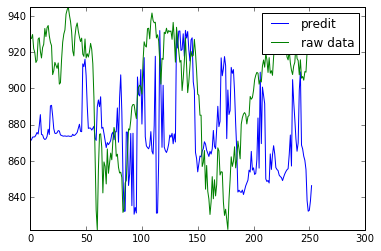

In [59]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 784568.0
change learning rate 0.1
loss: 1168.07
change learning rate 0.03486784401
loss: 1213.96
change learning rate 0.0121576654591
loss: 1303.79
change learning rate 0.00423911582752
loss: 1311.25
change learning rate 0.00147808829414
loss: 1311.38
change learning rate 0.000515377520732
loss: 1312.06
change learning rate 0.000179701029991
loss: 1312.4
change learning rate 6.26578748218e-05
loss: 1312.46
change learning rate 2.18474500528e-05
loss: 1312.59
change learning rate 7.61773480459e-06
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 170.490371943
Model restored.
loss: 1563.20880549


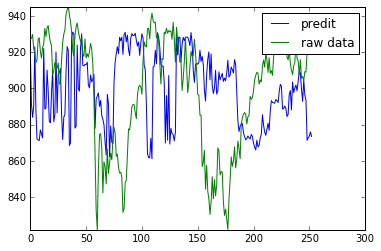

In [61]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 781258.0
change learning rate 0.1
loss: 527145.0
change learning rate 0.1
loss: 350125.0
change learning rate 0.1
loss: 226410.0
change learning rate 0.1
loss: 140990.0
change learning rate 0.1
loss: 84146.9
change learning rate 0.1
loss: 47969.7
change learning rate 0.1
loss: 26114.3
change learning rate 0.1
loss: 13624.3
change learning rate 0.1
loss: 6913.47
change learning rate 0.1
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 3.20401215553
Model restored.
loss: 4818.83666219


(array([ 822.070007]), array([ 945.130005]))

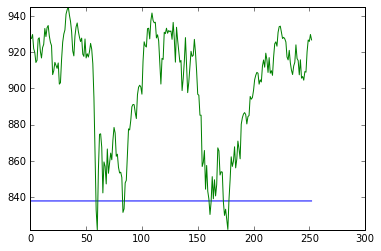

In [98]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=100)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

They seems to failn in learning, we will introduce pretraining.

# autoencoder

In [251]:
from sklearn.linear_model import LinearRegression


class MLP2(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # parameters
        self.W_list = []
        self.b_list = []
        self.gamma_list = []
        self.beta_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        n_layer = len(self.W_list)
        inpt = self._input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                beta = self.beta_list[i_layer]
                gamma = self.gamma_list[i_layer]
                z_normalized = self.batch_normalization(
                    tf.matmul(inpt, W), 
                    shape=self.layers[i_layer + 1],
                    gamma=gamma,
                    beta=beta
                )
                u = self.activation(z_normalized)
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38196.8
learning rate:  0.01
loss: 292.428
learning rate:  0.003486784401
loss: 278.368
learning rate:  0.00121576654591
loss: 276.451
learning rate:  0.000423911582752
loss: 275.964
learning rate:  0.000147808829414
loss: 275.705
learning rate:  5.15377520732e-05
loss: 275.644
learning rate:  1.79701029991e-05
loss: 275.616
learning rate:  6.26578748218e-06
loss: 275.602
learning rate:  2.18474500528e-06
loss: 275.593
learning rate:  7.61773480459e-07
pretraining for layer1
loss: 0.853071
learning rate:  0.01
loss: 4.64127e-06
learning rate:  0.003486784401
loss: 2.6698e-07
learning rate:  0.00121576654591
loss: 4.10168e-08
learning rate:  0.000423911582752
loss: 1.89173e-08
learning rate:  0.000147808829414
loss: 3.53092e-08
learning rate:  5.15377520732e-05
loss: 1.07984e-08
learning rate:  1.79701029991e-05
loss: 7.26367e-08
learning rate:  6.26578748218e-06
loss: 4.20258e-08
learning rate:  2.1

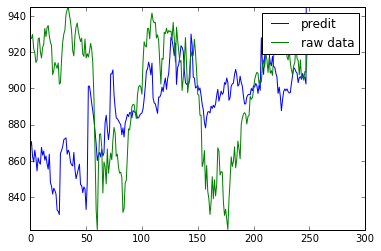

In [211]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38638.3
learning rate:  0.01
loss: 311.488
learning rate:  0.003486784401
loss: 281.599
learning rate:  0.00121576654591
loss: 279.724
learning rate:  0.000423911582752
loss: 279.196
learning rate:  0.000147808829414
loss: 278.988
learning rate:  5.15377520732e-05
loss: 278.927
learning rate:  1.79701029991e-05
loss: 278.903
learning rate:  6.26578748218e-06
loss: 278.891
learning rate:  2.18474500528e-06
loss: 278.889
learning rate:  7.61773480459e-07
regression loss: 149.557
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 164167.0
change learning rate 0.01
loss: 7231.72
change learning rate 0.003486784401
loss: 1198.0
change learning rate 0.00121576654591
loss: 933.594
change learning rate 0.000423911582752
loss: 1001.81
change learning rate 0.000147808829414
loss: 976.945
change learning rate 5.15377520732e-05
loss: 975.911
change learning rate 1.79701029

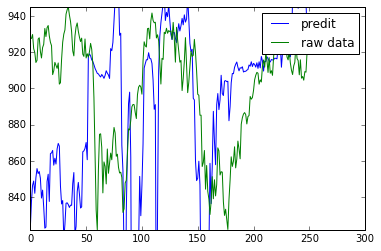

In [226]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [ ]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = n_hidden1
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

# change the data shape

In [212]:
df_input = input_data[1:] / input_data[:-1] - 1.0
df_target = target_data[1:] / target_data[:-1] -1.0

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 2.59484
learning rate:  0.01
loss: 0.000196067
learning rate:  0.003486784401
loss: 0.000144067
learning rate:  0.00121576654591
loss: 0.000105454
learning rate:  0.000423911582752
loss: 9.79314e-05
learning rate:  0.000147808829414
loss: 9.6228e-05
learning rate:  5.15377520732e-05
loss: 9.55638e-05
learning rate:  1.79701029991e-05
loss: 9.54227e-05
learning rate:  6.26578748218e-06
loss: 9.53846e-05
learning rate:  2.18474500528e-06
loss: 9.5368e-05
learning rate:  7.61773480459e-07
pretraining for layer1
loss: 0.702094
learning rate:  0.01
loss: 1.64392e-05
learning rate:  0.003486784401
loss: 2.0314e-07
learning rate:  0.00121576654591
loss: 3.87907e-09
learning rate:  0.000423911582752
loss: 1.62328e-09
learning rate:  0.000147808829414
loss: 0.22317
learning rate:  5.15377520732e-05
loss: 1.42116e-09
learning rate:  1.79701029991e-05
loss: 0.221652
learning rate:  6.26578748218e-06
loss: 3.18

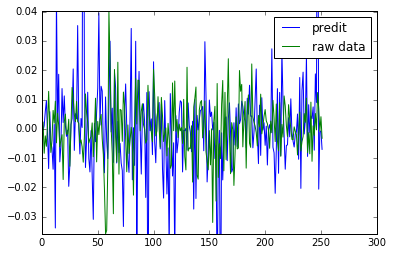

In [218]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3,  n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [219]:
print (np.mean(np.square(target_pred)))

0.000102108126894


start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 3.37477
learning rate:  0.01
loss: 0.0316131
learning rate:  0.01
loss: 0.000202537
learning rate:  0.01
loss: 0.000188982
learning rate:  0.01
loss: 0.000186677
learning rate:  0.01
loss: 0.000199923
learning rate:  0.01
loss: 0.000191916
learning rate:  0.01
loss: 0.000194262
learning rate:  0.01
loss: 0.000213816
learning rate:  0.01
loss: 0.000199898
learning rate:  0.01
pretraining for layer1
loss: 0.820604
learning rate:  0.01
loss: 0.00144395
learning rate:  0.01
loss: 0.00121698
learning rate:  0.01
loss: 0.00105302
learning rate:  0.01
loss: 0.000929142
learning rate:  0.01
loss: 0.000829187
learning rate:  0.01
loss: 0.000748466
learning rate:  0.01
loss: 0.000679341
learning rate:  0.01
loss: 0.000618218
learning rate:  0.01
loss: 0.000565841
learning rate:  0.01
pretraining for layer2
loss: 0.18863
learning rate:  0.01
loss: 0.000670137
learning rate:  0.01
loss: 0.000327837
learning rat

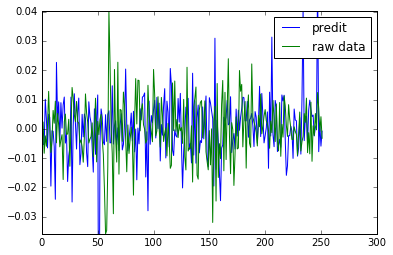

In [252]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=100,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

loss: 5.9924491896e-05
loss: 0.000173792241403
loss: 0.000162019209156
loss: 0.000313541173704


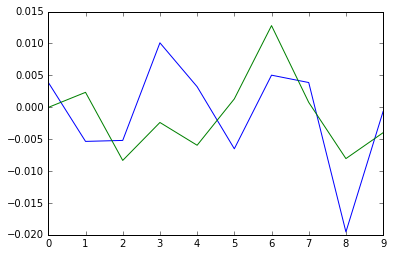

In [254]:
plt.plot(pred[:10], label="predit")
plt.plot(target_pred[:10], label="raw data")
print ("loss:", np.mean(np.square(pred[:10] - target_pred[:10])))
print ("loss:", np.mean(np.square(pred[:20] - target_pred[:20])))
print ("loss:", np.mean(np.square(pred[:50] - target_pred[:50])))
print ("loss:", np.mean(np.square(pred[:100] - target_pred[:100])))

###  use more recent data

In [256]:
from sklearn.linear_model import LinearRegression


class OnlineMLP(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # parameters
        self.W_list = []
        self.b_list = []
        self.gamma_list = []
        self.beta_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        n_layer = len(self.W_list)
        inpt = self._input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                beta = self.beta_list[i_layer]
                gamma = self.gamma_list[i_layer]
                z_normalized = self.batch_normalization(
                    tf.matmul(inpt, W), 
                    shape=self.layers[i_layer + 1],
                    gamma=gamma,
                    beta=beta
                )
                u = self.activation(z_normalized)
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def online_predict(self, input_data, target_data, n_batch=20, n_epochs=1000,
                                     learning_rate=1e-8, pre_n_epochs=100, pre_learning_rate=1e-8, 
                                     decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        predict_freq = int(n_data / 10)
        print_freq = int(n_epochs / 10)
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            outputs = []   # this will be return value
            for idx in xrange(n_data - n_batch):
                if idx % predict_freq == 0:
                    print ("predict [%d, %d]" %(idx, idx + n_batch - 1))
                          
                # each time you learn with n_batch lates data and predict with pred_input
                beg = idx
                end = idx + n_batch
                batch_input = input_data[beg:end]
                batch_target = target_data[beg:end]
                pred_input = [input_data[end]]
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: lr})
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                """        
                print ("loss:", 
                                   self.loss.eval(session=sess, 
                                                          feed_dict={self._input: batch_input,
                                                                               self._target: batch_target}))  
                print ("learning rate:", lr)
                """
                output = self._output.eval(session=sess, 
                                                               feed_dict={self._input: pred_input})
                outputs.append(output[0])
                
        return outputs

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 0.880956
learning rate:  0.01
loss: 0.000876478
learning rate:  0.01
loss: 0.000890501
learning rate:  0.01
loss: 0.000899032
learning rate:  0.01
loss: 0.000889787
learning rate:  0.01
loss: 0.000898841
learning rate:  0.01
loss: 0.000880369
learning rate:  0.01
loss: 0.000936989
learning rate:  0.01
loss: 0.000903918
learning rate:  0.01
loss: 0.000926972
learning rate:  0.01
pretraining for layer1
loss: 0.153252
learning rate:  0.01
loss: 0.00129981
learning rate:  0.01
loss: 0.00108974
learning rate:  0.01
loss: 0.000905295
learning rate:  0.01
loss: 0.000791244
learning rate:  0.01
loss: 0.000689827
learning rate:  0.01
loss: 0.000611229
learning rate:  0.01
loss: 0.00054243
learning rate:  0.01
loss: 0.000492129
learning rate:  0.01
loss: 0.000419158
learning rate:  0.01
pretraining for layer2
loss: 0.0181944
learning rate:  0.01
loss: 0.000251377
learning rate:  0.01
loss: 0.000171787
learnin

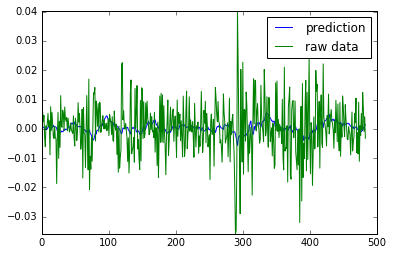

In [257]:
N = int(len(df_input) * 0.5)

n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20
target_pred = df_target[n_batch:]

mlp = OnlineMLP(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
prediction = mlp.online_predict(df_input, df_target,
                                                        learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                                                        n_batch=n_batch, n_epochs=1000, pre_learning_rate=1e-2,
                                                        pre_n_epochs=100, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

plt.plot(prediction, label="prediction")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(prediction - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [258]:
print (np.mean(np.square(target_pred)))

7.82711436546e-05


start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 34146.7
learning rate:  0.01
loss: 1327.9
learning rate:  0.009
loss: 603.238
learning rate:  0.0081
loss: 594.081
learning rate:  0.00729
loss: 582.354
learning rate:  0.006561
loss: 574.053
learning rate:  0.0059049
loss: 567.596
learning rate:  0.00531441
loss: 564.078
learning rate:  0.004782969
loss: 563.649
learning rate:  0.0043046721
loss: 557.902
learning rate:  0.00387420489
pretraining for layer1
loss: 0.107964
learning rate:  0.01
loss: 2.11483e-05
learning rate:  0.009
loss: 7.09985e-06
learning rate:  0.0081
loss: 8.52653e-06
learning rate:  0.00729
loss: 3.89113e-06
learning rate:  0.006561
loss: 6.86101e-06
learning rate:  0.0059049
loss: 3.19081e-06
learning rate:  0.00531441
loss: 2.02246e-05
learning rate:  0.004782969
loss: 8.7282e-06
learning rate:  0.0043046721
loss: 2.88949e-06
learning rate:  0.00387420489
pretraining for layer2
loss: 0.041797
learning rate:  0.01
loss: 8.677

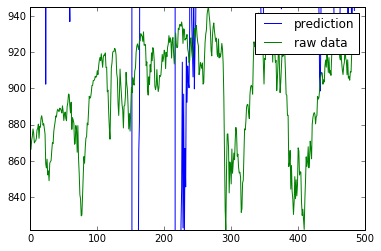

In [246]:
N = int(len(input_data) * 0.5)

n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20
target_pred = target_data[n_batch:]

mlp = OnlineMLP(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
prediction = mlp.online_predict(input_data, target_data,
                                                        learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                                                        n_batch=n_batch, n_epochs=1000, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

plt.plot(prediction, label="prediction")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(prediction - target_pred)))
plt.ylim(min(target_data), max(target_data))

plt.legend()

# without Batch Normalization

In [262]:
from sklearn.linear_model import LinearRegression


class MLP3(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # parameters
        self.W_list = []
        self.b_list = []
        self.gamma_list = []
        self.beta_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                x = self.activation(z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        n_layer = len(self.W_list)
        inpt = self._input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                u = self.activation(tf.matmul(inpt, W))
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 2.39586
learning rate:  0.01
loss: 0.0452083
learning rate:  0.01
loss: 0.0334761
learning rate:  0.01
loss: 0.0269651
learning rate:  0.01
loss: 0.0231348
learning rate:  0.01
loss: 0.0198746
learning rate:  0.01
loss: 0.0177435
learning rate:  0.01
loss: 0.0154776
learning rate:  0.01
loss: 0.0140821
learning rate:  0.01
loss: 0.0124564
learning rate:  0.01
pretraining for layer1
loss: 0.543828
learning rate:  0.01
loss: 0.00220938
learning rate:  0.01
loss: 0.00182147
learning rate:  0.01
loss: 0.00149133
learning rate:  0.01
loss: 0.00134969
learning rate:  0.01
loss: 0.00118146
learning rate:  0.01
loss: 0.00106969
learning rate:  0.01
loss: 0.000973792
learning rate:  0.01
loss: 0.000945352
learning rate:  0.01
loss: 0.000828594
learning rate:  0.01
pretraining for layer2
loss: 0.177448
learning rate:  0.01
loss: 1.45061e-05
learning rate:  0.01
loss: 1.24029e-05
learning rate:  0.01
loss: 1.1

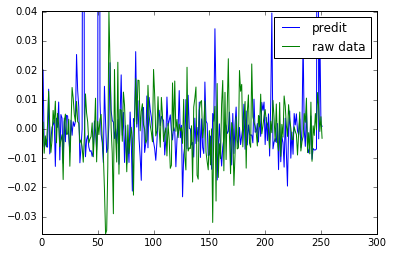

In [263]:
N = int(len(df_input) * 0.5)

input_train = df_input[:N]
target_train = df_target[:N]
input_pred = df_input[N:]
target_pred = df_target[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP3(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=100,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 37959.5
learning rate:  0.01
loss: 17089.8
learning rate:  0.009
loss: 9761.4
learning rate:  0.0081
loss: 5748.38
learning rate:  0.00729
loss: 3472.52
learning rate:  0.006561
loss: 2163.39
learning rate:  0.0059049
loss: 1376.45
learning rate:  0.00531441
loss: 887.209
learning rate:  0.004782969
loss: 595.204
learning rate:  0.0043046721
loss: 438.789
learning rate:  0.00387420489
pretraining for layer1
loss: 0.71811
learning rate:  0.01
loss: 0.00210591
learning rate:  0.009
loss: 0.00210591
learning rate:  0.0081
loss: 0.00210591
learning rate:  0.00729
loss: 0.00210591
learning rate:  0.006561
loss: 0.00210591
learning rate:  0.0059049
loss: 0.00210591
learning rate:  0.00531441
loss: 0.00210282
learning rate:  0.004782969
loss: 0.00209488
learning rate:  0.0043046721
loss: 0.00208867
learning rate:  0.00387420489
pretraining for layer2
loss: 0.280116
learning rate:  0.01
loss: 6.57062e-07
le

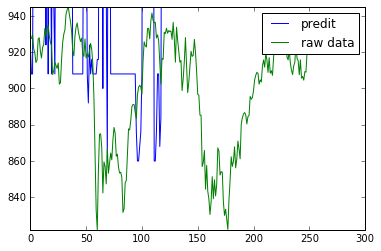

In [268]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP3(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [266]:
from sklearn.linear_model import LinearRegression


class MLP4(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # parameters
        self.W_list = []
        self.b_list = []
        self.gamma_list = []
        self.beta_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self._input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                x = self.activation(z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        n_layer = len(self.W_list)
        inpt = self._input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                b = self.b_list[i_layer]
                b_tilde = tf.Variable(tf.constant(0.0, shape=[self.layers[i_layer]]))
                u = self.activation(tf.matmul(inpt, W) + b)
                inpt_tilde = tf.matmul(u, tf.transpose(W) + b_tilde)
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

In [269]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP4(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 36871.3
learning rate:  0.01
loss: 6527.72
learning rate:  0.009
loss: 1604.3
learning rate:  0.0081
loss: 518.165
learning rate:  0.00729
loss: 353.384
learning rate:  0.006561
loss: 349.251
learning rate:  0.0059049
loss: 350.615
learning rate:  0.00531441
loss: 350.35
learning rate:  0.004782969
loss: 350.298
learning rate:  0.0043046721
loss: 350.488
learning rate:  0.00387420489
pretraining for layer1
loss: 0.732789
learning rate:  0.01
loss: 0.00125003
learning rate:  0.009
loss: 0.00125003
learning rate:  0.0081
loss: 0.00125003
learning rate:  0.00729
loss: 0.00125003
learning rate:  0.006561
loss: 0.00125003
learning rate:  0.0059049
loss: 0.00125003
learning rate:  0.00531441
loss: 0.00125003
learning rate:  0.004782969
loss: 0.00124165
learning rate:  0.0043046721
loss: 0.00118224
learning rate:  0.00387420489
pretraining for layer2
loss: 0.0641842
learning rate:  0.01
loss: 8.44769e-11
l

FailedPreconditionError: Attempting to use uninitialized value layer0_1/Variable
	 [[Node: save_2/save = SaveSlices[T=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_2/Const_0, save_2/save/tensor_names, save_2/save/shapes_and_slices, beta1_power, beta2_power, layer0/bias, layer0/bias/Optimizer, layer0/bias/Optimizer_1, layer0/weight, layer0/weight/Optimizer, layer0/weight/Optimizer_1, layer0_1/Variable, layer0_1/layer0_1/Variable/Optimizer, layer0_1/layer0_1/Variable/Optimizer_1, layer1/bias, layer1/bias/Optimizer, layer1/bias/Optimizer_1, layer1/weight, layer1/weight/Optimizer, layer1/weight/Optimizer_1, layer1_1/Variable, layer1_1/layer1_1/Variable/Optimizer, layer1_1/layer1_1/Variable/Optimizer_1, layer2/bias, layer2/bias/Optimizer, layer2/bias/Optimizer_1, layer2/weight, layer2/weight/Optimizer, layer2/weight/Optimizer_1, layer2_1/Variable, layer2_1/layer2_1/Variable/Optimizer, layer2_1/layer2_1/Variable/Optimizer_1, layer3/bias, layer3/bias/Optimizer, layer3/bias/Optimizer_1, layer3/weight, layer3/weight/Optimizer, layer3/weight/Optimizer_1)]]
Caused by op u'save_2/save', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-269-63c1affaab63>", line 21, in <module>
    pre_learning_rate=1e-2, is_pretrain=True)
  File "<ipython-input-266-7773bcfaed0f>", line 190, in training
    saver = tf.train.Saver(tf.all_variables())
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 845, in __init__
    restore_sequentially=restore_sequentially)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 513, in build
    save_tensor = self._AddSaveOps(filename_tensor, vars_to_save)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 212, in _AddSaveOps
    save = self.save_op(filename_tensor, vars_to_save)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/training/saver.py", line 164, in save_op
    tensor_slices=[vs.slice_spec for vs in vars_to_save])
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/io_ops.py", line 178, in _save
    tensors, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 437, in _save_slices
    data=data, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/op_def_library.py", line 711, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38102.5
learning rate:  0.01
loss: 293.425
learning rate:  0.003486784401
loss: 279.058
learning rate:  0.00121576654591
loss: 276.684
learning rate:  0.000423911582752
loss: 276.078
learning rate:  0.000147808829414
loss: 275.838
learning rate:  5.15377520732e-05
loss: 275.778
learning rate:  1.79701029991e-05
loss: 275.746
learning rate:  6.26578748218e-06
loss: 275.736
learning rate:  2.18474500528e-06
loss: 275.725
learning rate:  7.61773480459e-07
pretraining for layer1
loss: 0.6501
learning rate:  0.01
loss: 3.64106e-06
learning rate:  0.003486784401
loss: 4.48918e-07
learning rate:  0.00121576654591
loss: 5.50191e-08
learning rate:  0.000423911582752
loss: 2.96603e-08
learning rate:  0.000147808829414
loss: 2.45985e-08
learning rate:  5.15377520732e-05
loss: 4.0379e-07
learning rate:  1.79701029991e-05
loss: 2.05178e-08
learning rate:  6.26578748218e-06
loss: 1.31665e-08
learning rate:  2.184

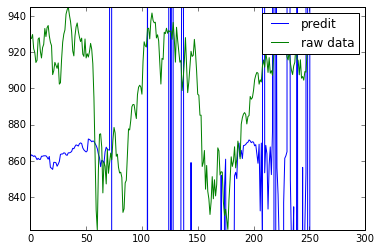

In [272]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-1, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=10000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38086.5
learning rate:  0.01
loss: 6528.87
learning rate:  0.009
loss: 1697.99
learning rate:  0.0081
loss: 557.381
learning rate:  0.00729
loss: 335.226
learning rate:  0.006561
loss: 313.987
learning rate:  0.0059049
loss: 311.985
learning rate:  0.00531441
loss: 307.615
learning rate:  0.004782969
loss: 301.785
learning rate:  0.0043046721
loss: 296.845
learning rate:  0.00387420489
pretraining for layer1
loss: 0.630986
learning rate:  0.01
loss: 9.90829e-06
learning rate:  0.009
loss: 1.20172e-05
learning rate:  0.0081
loss: 1.58605e-05
learning rate:  0.00729
loss: 1.16933e-05
learning rate:  0.006561
loss: 1.30184e-05
learning rate:  0.0059049
loss: 5.33885e-06
learning rate:  0.00531441
loss: 3.66396e-06
learning rate:  0.004782969
loss: 3.32745e-06
learning rate:  0.0043046721
loss: 3.67839e-05
learning rate:  0.00387420489
pretraining for layer2
loss: 0.24256
learning rate:  0.01
loss: 4.00

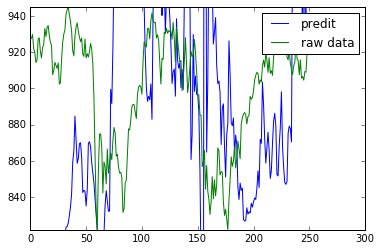

In [274]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38295.8
learning rate:  0.01
loss: 6594.23
learning rate:  0.009
loss: 1736.8
learning rate:  0.0081
loss: 569.135
learning rate:  0.00729
loss: 337.164
learning rate:  0.006561
loss: 315.542
learning rate:  0.0059049
loss: 311.477
learning rate:  0.00531441
loss: 306.569
learning rate:  0.004782969
loss: 301.065
learning rate:  0.0043046721
loss: 295.825
learning rate:  0.00387420489
pretraining for layer1
loss: 2.0378
learning rate:  0.01
loss: 0.00021455
learning rate:  0.009
loss: 8.52273e-05
learning rate:  0.0081
loss: 3.82429e-05
learning rate:  0.00729
loss: 2.31123e-05
learning rate:  0.006561
loss: 1.79621e-05
learning rate:  0.0059049
loss: 1.95869e-05
learning rate:  0.00531441
loss: 1.61429e-05
learning rate:  0.004782969
loss: 3.51614e-05
learning rate:  0.0043046721
loss: 1.67287e-05
learning rate:  0.00387420489
pretraining for layer2
loss: 2.60983
learning rate:  0.01
loss: 7.40718e

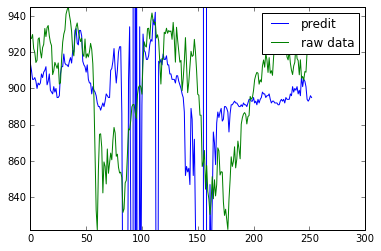

In [275]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38163.5
learning rate:  0.01
loss: 6523.5
learning rate:  0.01
loss: 1478.95
learning rate:  0.01
loss: 443.38
learning rate:  0.01
loss: 317.698
learning rate:  0.01
loss: 313.096
learning rate:  0.01
loss: 304.337
learning rate:  0.01
loss: 294.103
learning rate:  0.01
loss: 286.636
learning rate:  0.01
loss: 276.124
learning rate:  0.01
pretraining for layer1
loss: 0.961815
learning rate:  0.01
loss: 2.86802e-05
learning rate:  0.01
loss: 1.68909e-05
learning rate:  0.01
loss: 1.77952e-05
learning rate:  0.01
loss: 8.66017e-05
learning rate:  0.01
loss: 2.29562e-05
learning rate:  0.01
loss: 3.12702e-05
learning rate:  0.01
loss: 0.000150537
learning rate:  0.01
loss: 7.56688e-05
learning rate:  0.01
loss: 4.28976e-05
learning rate:  0.01
pretraining for layer2
loss: 1.86292
learning rate:  0.01
loss: 2.9169e-05
learning rate:  0.01
loss: 1.72607e-05
learning rate:  0.01
loss: 1.02095e-05
learnin

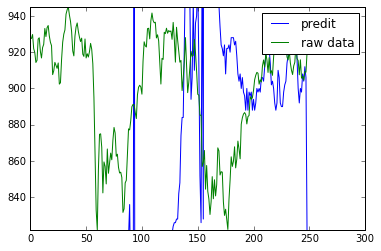

In [277]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38449.0
learning rate:  0.01
loss: 6634.95
learning rate:  0.01
loss: 1534.43
learning rate:  0.01
loss: 454.288
learning rate:  0.01
loss: 318.808
learning rate:  0.01
loss: 312.143
learning rate:  0.01
loss: 305.058
learning rate:  0.01
loss: 292.018
learning rate:  0.01
loss: 279.134
learning rate:  0.01
loss: 274.709
learning rate:  0.01
pretraining for layer1
loss: 1.33626
learning rate:  0.01
loss: 4.76529e-05
learning rate:  0.01
loss: 2.47508e-05
learning rate:  0.01
loss: 2.24696e-05
learning rate:  0.01
loss: 3.66407e-05
learning rate:  0.01
loss: 3.66006e-05
learning rate:  0.01
loss: 0.000135298
learning rate:  0.01
loss: 4.69804e-05
learning rate:  0.01
loss: 3.21715e-05
learning rate:  0.01
loss: 0.000212737
learning rate:  0.01
pretraining for layer2
loss: 1.68736
learning rate:  0.01
loss: 3.95981e-05
learning rate:  0.01
loss: 1.70841e-05
learning rate:  0.01
loss: 1.60195e-05
learn

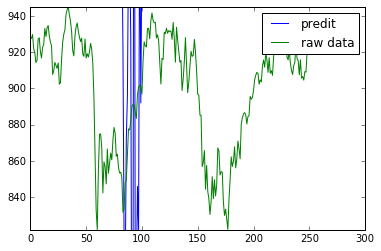

In [278]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-5, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38408.2
learning rate:  0.01
loss: 6660.09
learning rate:  0.01
loss: 1524.68
learning rate:  0.01
loss: 451.776
learning rate:  0.01
loss: 319.342
learning rate:  0.01
loss: 313.656
learning rate:  0.01
loss: 305.154
learning rate:  0.01
loss: 295.353
learning rate:  0.01
loss: 282.58
learning rate:  0.01
loss: 280.31
learning rate:  0.01
pretraining for layer1
loss: 1.43032
learning rate:  0.01
loss: 2.73539e-05
learning rate:  0.01
loss: 1.06883e-05
learning rate:  0.01
loss: 9.48006e-06
learning rate:  0.01
loss: 1.06311e-05
learning rate:  0.01
loss: 1.08054e-05
learning rate:  0.01
loss: 2.23612e-05
learning rate:  0.01
loss: 3.12173e-05
learning rate:  0.01
loss: 4.34832e-05
learning rate:  0.01
loss: 3.32123e-05
learning rate:  0.01
pretraining for layer2
loss: 2.51155
learning rate:  0.01
loss: 3.88098e-05
learning rate:  0.01
loss: 2.02359e-05
learning rate:  0.01
loss: 1.6743e-05
learning

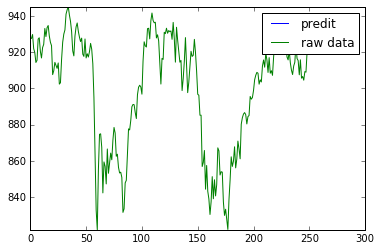

In [279]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

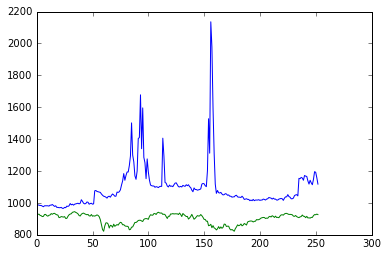

In [280]:
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 38476.0
learning rate:  0.01
loss: 6641.28
learning rate:  0.01
loss: 1533.67
learning rate:  0.01
loss: 454.162
learning rate:  0.01
loss: 317.641
learning rate:  0.01
loss: 313.407
learning rate:  0.01
loss: 304.917
learning rate:  0.01
loss: 295.122
learning rate:  0.01
loss: 283.766
learning rate:  0.01
loss: 274.955
learning rate:  0.01
pretraining for layer1
loss: 1.68677
learning rate:  0.01
loss: 3.51778e-05
learning rate:  0.01
loss: 2.05478e-05
learning rate:  0.01
loss: 3.16386e-05
learning rate:  0.01
loss: 1.18468e-05
learning rate:  0.01
loss: 1.8056e-05
learning rate:  0.01
loss: 4.60218e-05
learning rate:  0.01
loss: 6.16216e-05
learning rate:  0.01
loss: 3.736e-05
learning rate:  0.01
loss: 3.02957e-05
learning rate:  0.01
regression loss: 67.0603
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 1.39972e+06
change learning rate 1e-05
loss: 18

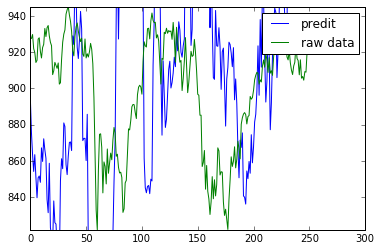

In [281]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP2(layers=[n_in, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-5, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-2, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [293]:
from sklearn.linear_model import LinearRegression


class MLP5(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # normalization for input
        shape = [self.layers[0]]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
                
        self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self.normalized_input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        n_layer = len(self.W_list)
        inpt = self.normalized_input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                beta = self.beta_list[i_layer + 1]
                gamma = self.gamma_list[i_layer + 1]
                z_normalized = self.batch_normalization(
                    tf.matmul(inpt, W), 
                    shape=self.layers[i_layer + 1],
                    gamma=gamma,
                    beta=beta
                )
                u = self.activation(z_normalized)
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

In [294]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-7, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.0955
learning rate:  0.0001
loss: 3.27915
learning rate:  0.0001
loss: 1.28908
learning rate:  0.0001
loss: 0.699831
learning rate:  0.0001
loss: 0.475683
learning rate:  0.0001
loss: 0.349737
learning rate:  0.0001


KeyboardInterrupt: 

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.3225
learning rate:  0.0001
loss: 3.85474
learning rate:  0.0001
loss: 1.46752
learning rate:  0.0001
loss: 0.73752
learning rate:  0.0001
loss: 0.487849
learning rate:  0.0001
loss: 0.362535
learning rate:  0.0001
loss: 0.273165
learning rate:  0.0001
loss: 0.203911
learning rate:  0.0001
loss: 0.150254
learning rate:  0.0001
loss: 0.109235
learning rate:  0.0001
pretraining for layer1
loss: 5.00244
learning rate:  0.0001
loss: 0.891538
learning rate:  0.0001
loss: 0.348542
learning rate:  0.0001
loss: 0.161543
learning rate:  0.0001
loss: 0.0874989
learning rate:  0.0001
loss: 0.0524158
learning rate:  0.0001
loss: 0.0313696
learning rate:  0.0001
loss: 0.0180538
learning rate:  0.0001
loss: 0.00999028
learning rate:  0.0001
loss: 0.0054238
learning rate:  0.0001
pretraining for layer2
loss: 2.37428
learning rate:  0.0001
loss: 0.498706
learning rate:  0.0001
loss: 0.192126
learning rate:  0.00

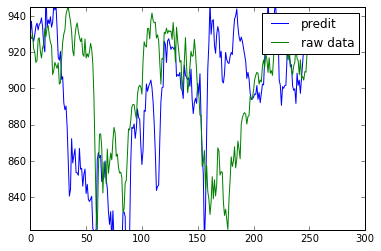

In [290]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-8, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.0198
learning rate:  0.0001
loss: 3.38928
learning rate:  0.0001
loss: 1.35816
learning rate:  0.0001
loss: 0.722722
learning rate:  0.0001
loss: 0.477083
learning rate:  0.0001
loss: 0.349988
learning rate:  0.0001
loss: 0.262808
learning rate:  0.0001
loss: 0.197137
learning rate:  0.0001
loss: 0.147223
learning rate:  0.0001
loss: 0.109331
learning rate:  0.0001
pretraining for layer1
loss: 5.20543
learning rate:  0.0001
loss: 0.902655
learning rate:  0.0001
loss: 0.351925
learning rate:  0.0001
loss: 0.171771
learning rate:  0.0001
loss: 0.0945565
learning rate:  0.0001
loss: 0.0534246
learning rate:  0.0001
loss: 0.0292069
learning rate:  0.0001
loss: 0.0152222
learning rate:  0.0001
loss: 0.00767034
learning rate:  0.0001
loss: 0.0039343
learning rate:  0.0001
pretraining for layer2
loss: 3.11482
learning rate:  0.0001
loss: 0.735119
learning rate:  0.0001
loss: 0.295802
learning rate:  0.0

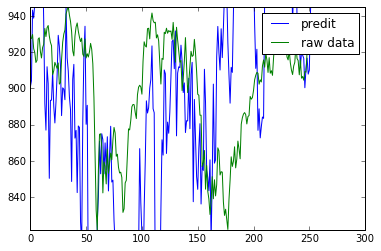

In [291]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.7475
learning rate:  0.0001
loss: 3.90118
learning rate:  0.0001
loss: 1.48403
learning rate:  0.0001
loss: 0.772686
learning rate:  0.0001
loss: 0.516505
learning rate:  0.0001
loss: 0.382212
learning rate:  0.0001
loss: 0.288804
learning rate:  0.0001
loss: 0.217998
learning rate:  0.0001
loss: 0.163359
learning rate:  0.0001
loss: 0.121205
learning rate:  0.0001
pretraining for layer1
loss: 6.04988
learning rate:  0.0001
loss: 1.18746
learning rate:  0.0001
loss: 0.502039
learning rate:  0.0001
loss: 0.233643
learning rate:  0.0001
loss: 0.115228
learning rate:  0.0001
loss: 0.0637196
learning rate:  0.0001
loss: 0.0373841
learning rate:  0.0001
loss: 0.0211542
learning rate:  0.0001
loss: 0.0113447
learning rate:  0.0001
loss: 0.00591538
learning rate:  0.0001
pretraining for layer2
loss: 2.53347
learning rate:  0.0001
loss: 0.539371
learning rate:  0.0001
loss: 0.198637
learning rate:  0.000

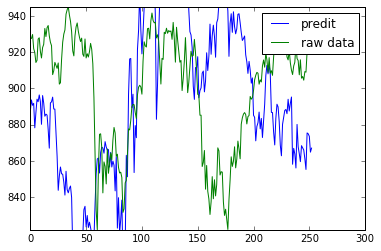

In [295]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-8, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.7304
learning rate:  1e-05
loss: 3.19764
learning rate:  1e-05
loss: 1.10982
learning rate:  1e-05
loss: 0.581279
learning rate:  1e-05
loss: 0.393515
learning rate:  1e-05
loss: 0.272434
learning rate:  1e-05
loss: 0.191102
learning rate:  1e-05
loss: 0.135283
learning rate:  1e-05
loss: 0.095773
learning rate:  1e-05
loss: 0.0672853
learning rate:  1e-05
pretraining for layer1
loss: 5.10205
learning rate:  1e-05
loss: 1.40986
learning rate:  1e-05
loss: 0.431484
learning rate:  1e-05
loss: 0.180563
learning rate:  1e-05
loss: 0.0893341
learning rate:  1e-05
loss: 0.0408913
learning rate:  1e-05
loss: 0.0155799
learning rate:  1e-05
loss: 0.00481429
learning rate:  1e-05
loss: 0.00160642
learning rate:  1e-05
loss: 0.000728353
learning rate:  1e-05
pretraining for layer2
loss: 1.29569
learning rate:  1e-05
loss: 0.319096
learning rate:  1e-05
loss: 0.0631197
learning rate:  1e-05
loss: 0.0151767

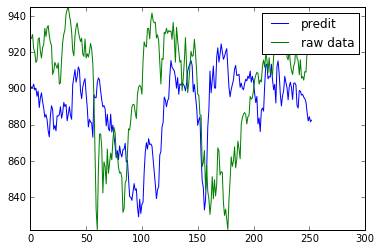

In [296]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-7, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=10000,
                      pre_learning_rate=1e-5, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

We will normalize target_data because too large scale error will make derivative of hidden layers large.

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.2769
learning rate:  0.0001
loss: 4.02819
learning rate:  0.0001
loss: 1.54866
learning rate:  0.0001
loss: 0.787691
learning rate:  0.0001
loss: 0.514312
learning rate:  0.0001
loss: 0.372864
learning rate:  0.0001
loss: 0.277741
learning rate:  0.0001
loss: 0.208644
learning rate:  0.0001
loss: 0.156762
learning rate:  0.0001
loss: 0.117224
learning rate:  0.0001
pretraining for layer1
loss: 5.51131
learning rate:  0.0001
loss: 1.03903
learning rate:  0.0001
loss: 0.384056
learning rate:  0.0001
loss: 0.169251
learning rate:  0.0001
loss: 0.0909528
learning rate:  0.0001
loss: 0.0517136
learning rate:  0.0001
loss: 0.0290949
learning rate:  0.0001
loss: 0.0159186
learning rate:  0.0001
loss: 0.00842752
learning rate:  0.0001
loss: 0.00444743
learning rate:  0.0001
pretraining for layer2
loss: 3.063
learning rate:  0.0001
loss: 0.871947
learning rate:  0.0001
loss: 0.443614
learning rate:  0.000

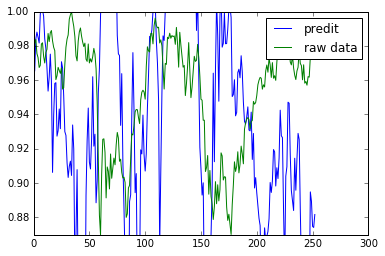

In [299]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.206
learning rate:  0.0001
loss: 3.36694
learning rate:  0.0001
loss: 1.3703
learning rate:  0.0001
loss: 0.755295
learning rate:  0.0001
loss: 0.521533
learning rate:  0.0001
loss: 0.385984
learning rate:  0.0001
loss: 0.28731
learning rate:  0.0001
loss: 0.212945
learning rate:  0.0001
loss: 0.157154
learning rate:  0.0001
loss: 0.115713
learning rate:  0.0001
pretraining for layer1
loss: 5.74635
learning rate:  0.0001
loss: 0.985653
learning rate:  0.0001
loss: 0.359566
learning rate:  0.0001
loss: 0.153755
learning rate:  0.0001
loss: 0.0797957
learning rate:  0.0001
loss: 0.0451473
learning rate:  0.0001
loss: 0.0251161
learning rate:  0.0001
loss: 0.013535
learning rate:  0.0001
loss: 0.00721278
learning rate:  0.0001
loss: 0.00400234
learning rate:  0.0001
pretraining for layer2
loss: 2.87513
learning rate:  0.0001
loss: 0.654477
learning rate:  0.0001
loss: 0.275183
learning rate:  0.0001

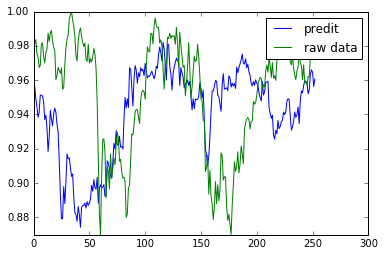

In [300]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.9498
learning rate:  0.0001
loss: 4.03818
learning rate:  0.0001
loss: 1.47685
learning rate:  0.0001
loss: 0.722156
learning rate:  0.0001
loss: 0.478407
learning rate:  0.0001
loss: 0.353008
learning rate:  0.0001
loss: 0.265827
learning rate:  0.0001
loss: 0.200688
learning rate:  0.0001
loss: 0.150659
learning rate:  0.0001
loss: 0.112061
learning rate:  0.0001
pretraining for layer1
loss: 3.92856
learning rate:  0.0001
loss: 0.665241
learning rate:  0.0001
loss: 0.27109
learning rate:  0.0001
loss: 0.137824
learning rate:  0.0001
loss: 0.0778745
learning rate:  0.0001
loss: 0.0447916
learning rate:  0.0001
loss: 0.0254529
learning rate:  0.0001
loss: 0.0141664
learning rate:  0.0001
loss: 0.00774228
learning rate:  0.0001
loss: 0.00426804
learning rate:  0.0001
pretraining for layer2
loss: 2.84636
learning rate:  0.0001
loss: 0.777609
learning rate:  0.0001
loss: 0.348315
learning rate:  0.0

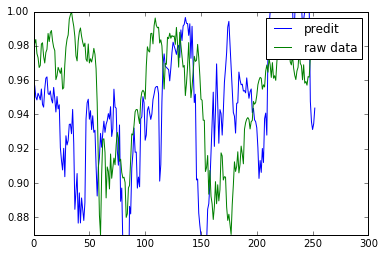

In [303]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 13.2096
learning rate:  0.0001
loss: 4.20977
learning rate:  0.0001
loss: 1.60991
learning rate:  0.0001
loss: 0.766778
learning rate:  0.0001
loss: 0.476684
learning rate:  0.0001
loss: 0.347304
learning rate:  0.0001
loss: 0.262285
learning rate:  0.0001
loss: 0.198375
learning rate:  0.0001
loss: 0.149265
learning rate:  0.0001
loss: 0.111512
learning rate:  0.0001
pretraining for layer1
loss: 5.3621
learning rate:  0.0001
loss: 0.905195
learning rate:  0.0001
loss: 0.351173
learning rate:  0.0001
loss: 0.173281
learning rate:  0.0001
loss: 0.0986776
learning rate:  0.0001
loss: 0.0581121
learning rate:  0.0001
loss: 0.033478
learning rate:  0.0001
loss: 0.0186845
learning rate:  0.0001
loss: 0.0101342
learning rate:  0.0001
loss: 0.00546896
learning rate:  0.0001
pretraining for layer2
loss: 3.29026
learning rate:  0.0001
loss: 1.03146
learning rate:  0.0001
loss: 0.489963
learning rate:  0.0001

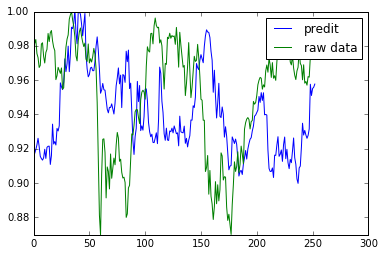

In [310]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.0283
learning rate:  0.0001
loss: 3.62912
learning rate:  9.9e-05
loss: 1.54066
learning rate:  9.801e-05
loss: 0.810085
learning rate:  9.70299e-05
loss: 0.524352
learning rate:  9.6059601e-05
loss: 0.381696
learning rate:  9.509900499e-05
loss: 0.285745
learning rate:  9.41480149401e-05
loss: 0.213319
learning rate:  9.32065347907e-05
loss: 0.158588
learning rate:  9.22744694428e-05
loss: 0.117734
learning rate:  9.13517247484e-05
pretraining for layer1
loss: 4.86599
learning rate:  0.0001
loss: 0.764602
learning rate:  9.9e-05
loss: 0.281023
learning rate:  9.801e-05
loss: 0.1478
learning rate:  9.70299e-05
loss: 0.0864688
learning rate:  9.6059601e-05
loss: 0.0499132
learning rate:  9.509900499e-05
loss: 0.0280295
learning rate:  9.41480149401e-05
loss: 0.0153681
learning rate:  9.32065347907e-05
loss: 0.00832341
learning rate:  9.22744694428e-05
loss: 0.00460181
learning rate:  9.13517247484

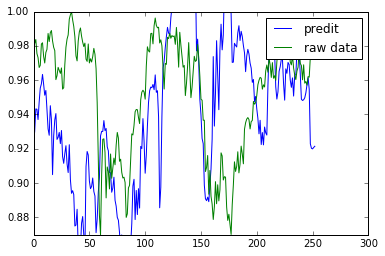

In [311]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=0.99,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.143
learning rate:  0.0001
loss: 3.90339
learning rate:  9e-05
loss: 1.68373
learning rate:  8.1e-05
loss: 0.928087
learning rate:  7.29e-05
loss: 0.631925
learning rate:  6.561e-05
loss: 0.489448
learning rate:  5.9049e-05
loss: 0.39971
learning rate:  5.31441e-05
loss: 0.333306
learning rate:  4.782969e-05
loss: 0.282035
learning rate:  4.3046721e-05
loss: 0.242068
learning rate:  3.87420489e-05
pretraining for layer1
loss: 6.56185
learning rate:  0.0001
loss: 1.55941
learning rate:  9e-05
loss: 0.723824
learning rate:  8.1e-05
loss: 0.377089
learning rate:  7.29e-05
loss: 0.209051
learning rate:  6.561e-05
loss: 0.117171
learning rate:  5.9049e-05
loss: 0.0657509
learning rate:  5.31441e-05
loss: 0.0385485
learning rate:  4.782969e-05
loss: 0.0245091
learning rate:  4.3046721e-05
loss: 0.0167211
learning rate:  3.87420489e-05
pretraining for layer2
loss: 3.28337
learning rate:  0.0001
loss: 0.

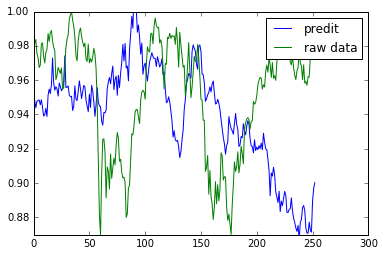

In [312]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-6, decay_freq=100, decay_rate=0.9,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 10.1438
learning rate:  0.0001
loss: 3.05043
learning rate:  0.0001
loss: 1.27827
learning rate:  0.0001
loss: 0.72242
learning rate:  0.0001
loss: 0.499823
learning rate:  0.0001
loss: 0.373826
learning rate:  0.0001
loss: 0.282306
learning rate:  0.0001
loss: 0.21261
learning rate:  0.0001
loss: 0.159164
learning rate:  0.0001
loss: 0.118128
learning rate:  0.0001
pretraining for layer1
loss: 5.58256
learning rate:  0.0001
loss: 0.941249
learning rate:  0.0001
loss: 0.33599
learning rate:  0.0001
loss: 0.158199
learning rate:  0.0001
loss: 0.0902304
learning rate:  0.0001
loss: 0.0534733
learning rate:  0.0001
loss: 0.0308388
learning rate:  0.0001
loss: 0.0171554
learning rate:  0.0001
loss: 0.00926062
learning rate:  0.0001
loss: 0.00499541
learning rate:  0.0001
regression loss: 0.000117613
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.000122342
cha

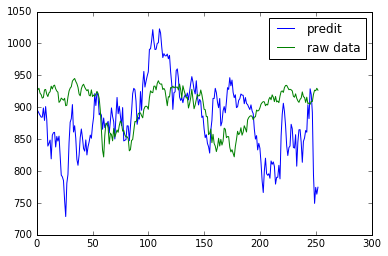

In [318]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-5, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 10.7327
learning rate:  0.0001
loss: 3.22724
learning rate:  0.0001
loss: 1.2797
learning rate:  0.0001
loss: 0.707008
learning rate:  0.0001
loss: 0.49009
learning rate:  0.0001
loss: 0.369815
learning rate:  0.0001
loss: 0.283576
learning rate:  0.0001
loss: 0.215825
learning rate:  0.0001
loss: 0.16219
learning rate:  0.0001
loss: 0.120237
learning rate:  0.0001
pretraining for layer1
loss: 5.05217
learning rate:  0.0001
loss: 0.975537
learning rate:  0.0001
loss: 0.411296
learning rate:  0.0001
loss: 0.191158
learning rate:  0.0001
loss: 0.0949963
learning rate:  0.0001
loss: 0.0524958
learning rate:  0.0001
loss: 0.0303061
learning rate:  0.0001
loss: 0.0169866
learning rate:  0.0001
loss: 0.00917156
learning rate:  0.0001
loss: 0.00489406
learning rate:  0.0001
regression loss: 0.000108785
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.00013975
chan

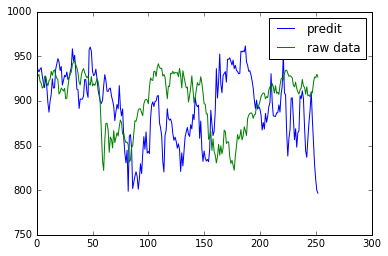

In [320]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.0726
learning rate:  0.0001
loss: 3.31958
learning rate:  0.0001
loss: 1.28263
learning rate:  0.0001
loss: 0.700887
learning rate:  0.0001
loss: 0.488414
learning rate:  0.0001
loss: 0.366837
learning rate:  0.0001
loss: 0.278159
learning rate:  0.0001
loss: 0.210285
learning rate:  0.0001
loss: 0.157975
learning rate:  0.0001
loss: 0.117703
learning rate:  0.0001
pretraining for layer1
loss: 6.51791
learning rate:  0.0001
loss: 1.2946
learning rate:  0.0001
loss: 0.495867
learning rate:  0.0001
loss: 0.207177
learning rate:  0.0001
loss: 0.0969754
learning rate:  0.0001
loss: 0.0533866
learning rate:  0.0001
loss: 0.0310259
learning rate:  0.0001
loss: 0.0175267
learning rate:  0.0001
loss: 0.0095521
learning rate:  0.0001
loss: 0.00514536
learning rate:  0.0001
regression loss: 0.000125274
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.00186559
chan

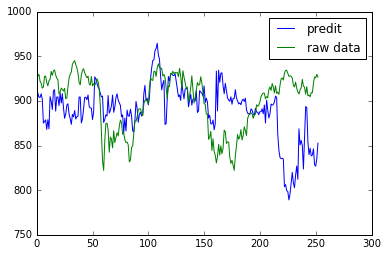

In [321]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 8.59451
learning rate:  0.0001
loss: 2.465
learning rate:  0.0001
loss: 1.03869
learning rate:  0.0001
loss: 0.625726
learning rate:  0.0001
loss: 0.4411
learning rate:  0.0001
loss: 0.321915
learning rate:  0.0001
loss: 0.238071
learning rate:  0.0001
loss: 0.177403
learning rate:  0.0001
loss: 0.133002
learning rate:  0.0001
loss: 0.100093
learning rate:  0.0001
pretraining for layer1
loss: 5.68793
learning rate:  0.0001
loss: 1.04244
learning rate:  0.0001
loss: 0.382854
learning rate:  0.0001
loss: 0.172125
learning rate:  0.0001
loss: 0.0955442
learning rate:  0.0001
loss: 0.0565003
learning rate:  0.0001
loss: 0.0326625
learning rate:  0.0001
loss: 0.0182252
learning rate:  0.0001
loss: 0.00989352
learning rate:  0.0001
loss: 0.00537513
learning rate:  0.0001
regression loss: 0.000105503
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.00184287
change

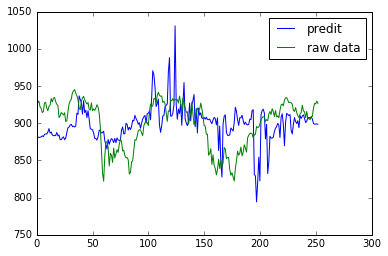

In [322]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 9.89347
learning rate:  0.0001
loss: 2.82799
learning rate:  0.0001
loss: 1.16598
learning rate:  0.0001
loss: 0.681384
learning rate:  0.0001
loss: 0.480272
learning rate:  0.0001
loss: 0.359434
learning rate:  0.0001
loss: 0.273492
learning rate:  0.0001
loss: 0.207591
learning rate:  0.0001
loss: 0.15598
learning rate:  0.0001
loss: 0.115832
learning rate:  0.0001
pretraining for layer1
loss: 5.02952
learning rate:  0.0001
loss: 0.895078
learning rate:  0.0001
loss: 0.344318
learning rate:  0.0001
loss: 0.172275
learning rate:  0.0001
loss: 0.100528
learning rate:  0.0001
loss: 0.0582794
learning rate:  0.0001
loss: 0.0317391
learning rate:  0.0001
loss: 0.0163288
learning rate:  0.0001
loss: 0.00826811
learning rate:  0.0001
loss: 0.00432703
learning rate:  0.0001
pretraining for layer2
loss: 3.72368
learning rate:  0.0001
loss: 0.955208
learning rate:  0.0001
loss: 0.39102
learning rate:  0.000

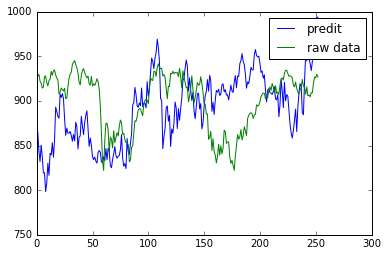

In [324]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 9.3744
learning rate:  0.0001
loss: 2.70287
learning rate:  0.0001
loss: 1.07955
learning rate:  0.0001
loss: 0.63183
learning rate:  0.0001
loss: 0.444152
learning rate:  0.0001
loss: 0.323175
learning rate:  0.0001
loss: 0.237184
learning rate:  0.0001
loss: 0.174409
learning rate:  0.0001
loss: 0.128154
learning rate:  0.0001
loss: 0.093827
learning rate:  0.0001
pretraining for layer1
loss: 4.96092
learning rate:  0.0001
loss: 0.835057
learning rate:  0.0001
loss: 0.321325
learning rate:  0.0001
loss: 0.150714
learning rate:  0.0001
loss: 0.0812227
learning rate:  0.0001
loss: 0.0472697
learning rate:  0.0001
loss: 0.0272655
learning rate:  0.0001
loss: 0.0151029
learning rate:  0.0001
loss: 0.00807484
learning rate:  0.0001
loss: 0.00432492
learning rate:  0.0001
pretraining for layer2
loss: 3.27474
learning rate:  0.0001
loss: 0.855281
learning rate:  0.0001
loss: 0.367408
learning rate:  0.00

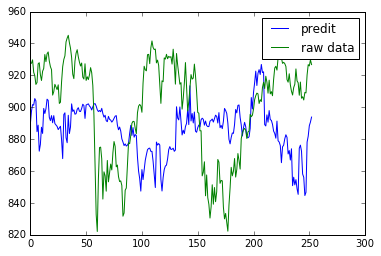

In [325]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 10.7224
learning rate:  0.0001
loss: 3.25236
learning rate:  0.0001
loss: 1.28181
learning rate:  0.0001
loss: 0.739139
learning rate:  0.0001
loss: 0.531648
learning rate:  0.0001
loss: 0.397287
learning rate:  0.0001
loss: 0.297251
learning rate:  0.0001
loss: 0.220793
learning rate:  0.0001
loss: 0.162213
learning rate:  0.0001
loss: 0.117955
learning rate:  0.0001
pretraining for layer1
loss: 4.92141
learning rate:  0.0001
loss: 0.779658
learning rate:  0.0001
loss: 0.303323
learning rate:  0.0001
loss: 0.146365
learning rate:  0.0001
loss: 0.0803289
learning rate:  0.0001
loss: 0.045813
learning rate:  0.0001
loss: 0.0254121
learning rate:  0.0001
loss: 0.0136588
learning rate:  0.0001
loss: 0.0071398
learning rate:  0.0001
loss: 0.00374114
learning rate:  0.0001
pretraining for layer2
loss: 2.92217
learning rate:  0.0001
loss: 0.665248
learning rate:  0.0001
loss: 0.267987
learning rate:  0.00

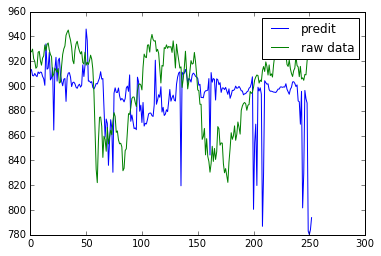

In [326]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 11.4332
learning rate:  0.0001
loss: 3.37754
learning rate:  0.0001
loss: 1.2584
learning rate:  0.0001
loss: 0.679467
learning rate:  0.0001
loss: 0.470087
learning rate:  0.0001
loss: 0.352886
learning rate:  0.0001
loss: 0.270487
learning rate:  0.0001
loss: 0.207239
learning rate:  0.0001
loss: 0.157024
learning rate:  0.0001
loss: 0.117224
learning rate:  0.0001
pretraining for layer1
loss: 10.2732
learning rate:  0.0001
loss: 1.4753
learning rate:  0.0001
loss: 0.708068
learning rate:  0.0001
loss: 0.418488
learning rate:  0.0001
loss: 0.258028
learning rate:  0.0001
loss: 0.158205
learning rate:  0.0001
loss: 0.0942249
learning rate:  0.0001
loss: 0.0532938
learning rate:  0.0001
loss: 0.0279453
learning rate:  0.0001
loss: 0.0133527
learning rate:  0.0001
regression loss: 6.79652e-05
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.00289566
change l

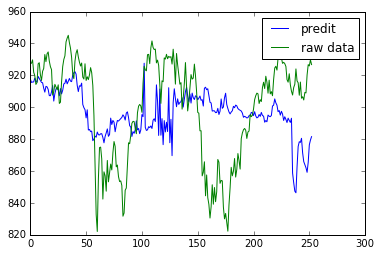

In [327]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.6205
learning rate:  0.0001
loss: 3.83367
learning rate:  0.0001
loss: 1.46501
learning rate:  0.0001
loss: 0.760627
learning rate:  0.0001
loss: 0.506418
learning rate:  0.0001
loss: 0.373151
learning rate:  0.0001
loss: 0.279647
learning rate:  0.0001
loss: 0.208926
learning rate:  0.0001
loss: 0.154857
learning rate:  0.0001
loss: 0.113707
learning rate:  0.0001
pretraining for layer1
loss: 10.3024
learning rate:  0.0001
loss: 1.44318
learning rate:  0.0001
loss: 0.716265
learning rate:  0.0001
loss: 0.442759
learning rate:  0.0001
loss: 0.276042
learning rate:  0.0001
loss: 0.168216
learning rate:  0.0001
loss: 0.0989132
learning rate:  0.0001
loss: 0.0550568
learning rate:  0.0001
loss: 0.0284047
learning rate:  0.0001
loss: 0.013319
learning rate:  0.0001
pretraining for layer2
loss: 11.8615
learning rate:  0.0001
loss: 1.21019
learning rate:  0.0001
loss: 0.393216
learning rate:  0.0001
lo

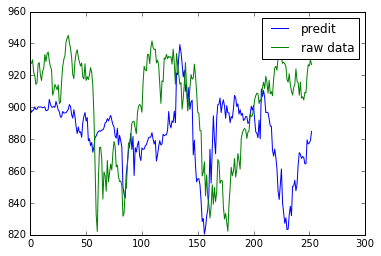

In [328]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

# use subset

In [ ]:
stock_idx = np.arange(20)
np.random.shuffle(stock_idx)
input_mini = input_data[:, stock_idx]

In [332]:
print (input_mini.shape)

(505, 20)


start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 2.62684
learning rate:  0.0001
loss: 1.36497
learning rate:  0.0001
loss: 0.777942
learning rate:  0.0001
loss: 0.471526
learning rate:  0.0001
loss: 0.299407
learning rate:  0.0001
loss: 0.19838
learning rate:  0.0001
loss: 0.13602
learning rate:  0.0001
loss: 0.0942469
learning rate:  0.0001
loss: 0.0648691
learning rate:  0.0001
loss: 0.0440784
learning rate:  0.0001
pretraining for layer1
loss: 0.693469
learning rate:  0.0001
loss: 0.200586
learning rate:  0.0001
loss: 0.0839637
learning rate:  0.0001
loss: 0.0334391
learning rate:  0.0001
loss: 0.012225
learning rate:  0.0001
loss: 0.00494035
learning rate:  0.0001
loss: 0.00254577
learning rate:  0.0001
loss: 0.00152902
learning rate:  0.0001
loss: 0.00098827
learning rate:  0.0001
loss: 0.00066038
learning rate:  0.0001
regression loss: 0.000300432
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.000

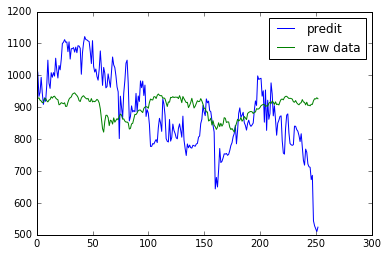

In [333]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_mini[:N]
target_train = target_tilde[:N]
input_pred = input_mini[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

In [ ]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_mini[:N]
target_train = target_tilde[:N]
input_pred = input_mini[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
# n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

### use only recent data

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 7.57518
learning rate:  0.0001
loss: 2.01331
learning rate:  0.0001
loss: 0.710388
learning rate:  0.0001
loss: 0.343404
learning rate:  0.0001
loss: 0.206663
learning rate:  0.0001
loss: 0.127466
learning rate:  0.0001
loss: 0.0733823
learning rate:  0.0001
loss: 0.0381277
learning rate:  0.0001
loss: 0.0173002
learning rate:  0.0001
loss: 0.0065645
learning rate:  0.0001
pretraining for layer1
loss: 1.08494
learning rate:  0.0001
loss: 0.188216
learning rate:  0.0001
loss: 0.0560523
learning rate:  0.0001
loss: 0.0150748
learning rate:  0.0001
loss: 0.00326899
learning rate:  0.0001
loss: 0.000918136
learning rate:  0.0001
loss: 0.000291478
learning rate:  0.0001
loss: 0.000120422
learning rate:  0.0001
loss: 6.93649e-05
learning rate:  0.0001
loss: 4.63053e-05
learning rate:  0.0001
regression loss: 0.000236945
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
lo

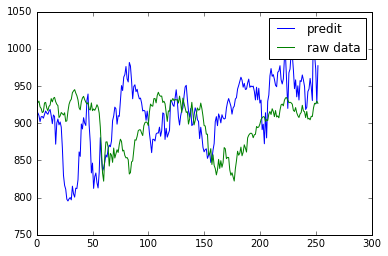

In [335]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

loss: 0.000492509281148


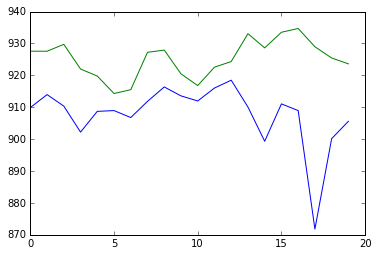

In [336]:
plt.plot(np.max(target_data) * pred[:20], label="predit")
plt.plot(np.max(target_data) * target_pred[:20], label="raw data")
print ("loss:", np.mean(np.square(pred[:20] - target_pred[:20])))

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 6.55586
learning rate:  0.0001
loss: 1.46736
learning rate:  0.0001
loss: 0.5515
learning rate:  0.0001
loss: 0.312765
learning rate:  0.0001
loss: 0.193911
learning rate:  0.0001
loss: 0.120063
learning rate:  0.0001
loss: 0.0698602
learning rate:  0.0001
loss: 0.036418
learning rate:  0.0001
loss: 0.0164285
learning rate:  0.0001
loss: 0.0061759
learning rate:  0.0001
pretraining for layer1
loss: 1.48689
learning rate:  0.0001
loss: 0.288411
learning rate:  0.0001
loss: 0.0853629
learning rate:  0.0001
loss: 0.0224353
learning rate:  0.0001
loss: 0.00668404
learning rate:  0.0001
loss: 0.00244068
learning rate:  0.0001
loss: 0.000811086
learning rate:  0.0001
loss: 0.000247545
learning rate:  0.0001
loss: 8.17325e-05
learning rate:  0.0001
loss: 3.44482e-05
learning rate:  0.0001
regression loss: 0.000206997
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 

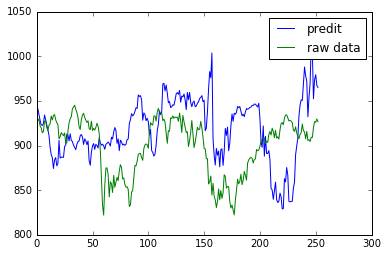

In [340]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 5.57911
learning rate:  0.0001
loss: 1.35867
learning rate:  0.0001
loss: 0.557411
learning rate:  0.0001
loss: 0.314221
learning rate:  0.0001
loss: 0.192832
learning rate:  0.0001
loss: 0.114703
learning rate:  0.0001
loss: 0.0634193
learning rate:  0.0001
loss: 0.031329
learning rate:  0.0001
loss: 0.0134389
learning rate:  0.0001
loss: 0.00496076
learning rate:  0.0001
pretraining for layer1
loss: 6.84275
learning rate:  0.0001
loss: 0.43346
learning rate:  0.0001
loss: 0.0934359
learning rate:  0.0001
loss: 0.0345538
learning rate:  0.0001
loss: 0.0134
learning rate:  0.0001
loss: 0.00530947
learning rate:  0.0001
loss: 0.00217979
learning rate:  0.0001
loss: 0.000811522
learning rate:  0.0001
loss: 0.00039902
learning rate:  0.0001
loss: 0.000156968
learning rate:  0.0001
pretraining for layer2
loss: 2.42448
learning rate:  0.0001
loss: 0.612677
learning rate:  0.0001
loss: 0.204382
learning r

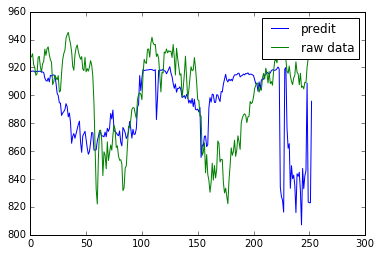

In [390]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden1, n_hidden2, n_hidden2, n_hidden3, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 13.678
learning rate:  0.0001
loss: 2.35557
learning rate:  0.0001
loss: 0.73403
learning rate:  0.0001
loss: 0.397193
learning rate:  0.0001
loss: 0.255802
learning rate:  0.0001
loss: 0.167038
learning rate:  0.0001
loss: 0.107137
learning rate:  0.0001
loss: 0.0665842
learning rate:  0.0001
loss: 0.0396218
learning rate:  0.0001
loss: 0.0221185
learning rate:  0.0001
regression loss: 4.29696e-05
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.000691028
change learning rate 0.001
loss: 0.0135768
change learning rate 0.001
loss: 0.0105319
change learning rate 0.001
loss: 0.00925585
change learning rate 0.001
loss: 0.00834222
change learning rate 0.001
loss: 0.00722772
change learning rate 0.001
loss: 0.00662966
change learning rate 0.001
loss: 0.00602318
change learning rate 0.001
loss: 0.00557207
change learning rate 0.001
loss: 0.00535291
change learnin

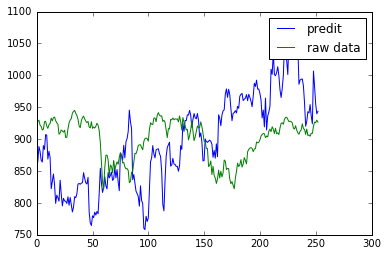

In [391]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 7.11997
learning rate:  0.0001
loss: 1.79023
learning rate:  0.0001
loss: 0.654485
learning rate:  0.0001
loss: 0.357064
learning rate:  0.0001
loss: 0.22306
learning rate:  0.0001
loss: 0.137122
learning rate:  0.0001
loss: 0.0802701
learning rate:  0.0001
loss: 0.0434421
learning rate:  0.0001
loss: 0.0211447
learning rate:  0.0001
loss: 0.00894883
learning rate:  0.0001
pretraining for layer1
loss: 6.0428
learning rate:  0.0001
loss: 0.444209
learning rate:  0.0001
loss: 0.175162
learning rate:  0.0001
loss: 0.0823854
learning rate:  0.0001
loss: 0.036325
learning rate:  0.0001
loss: 0.0141252
learning rate:  0.0001
loss: 0.00474581
learning rate:  0.0001
loss: 0.00137031
learning rate:  0.0001
loss: 0.000374923
learning rate:  0.0001
loss: 0.000122157
learning rate:  0.0001
regression loss: 6.92337e-05
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.24

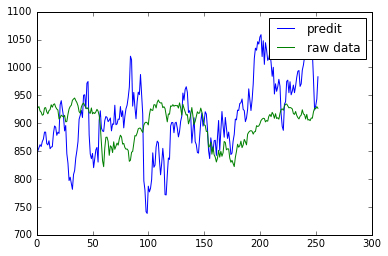

In [392]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 6.60472
learning rate:  0.0001
loss: 1.57318
learning rate:  0.0001
loss: 0.586343
learning rate:  0.0001
loss: 0.336418
learning rate:  0.0001
loss: 0.216468
learning rate:  0.0001
loss: 0.136255
learning rate:  0.0001
loss: 0.0806387
learning rate:  0.0001
loss: 0.0438242
learning rate:  0.0001
loss: 0.0214675
learning rate:  0.0001
loss: 0.00937723
learning rate:  0.0001
pretraining for layer1
loss: 6.89865
learning rate:  0.0001
loss: 0.48877
learning rate:  0.0001
loss: 0.129164
learning rate:  0.0001
loss: 0.0481505
learning rate:  0.0001
loss: 0.0179961
learning rate:  0.0001
loss: 0.00687327
learning rate:  0.0001
loss: 0.00266841
learning rate:  0.0001
loss: 0.000946969
learning rate:  0.0001
loss: 0.000313849
learning rate:  0.0001
loss: 0.00011134
learning rate:  0.0001
regression loss: 67.5251
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 2.418

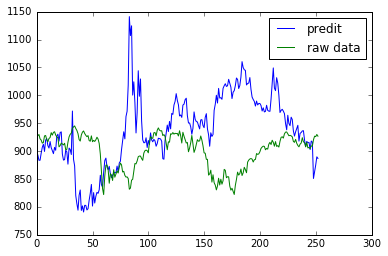

In [393]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_data[N_recent:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden1, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 12.2799
learning rate:  0.0001
loss: 2.28438
learning rate:  0.0001
loss: 0.768137
learning rate:  0.0001
loss: 0.445782
learning rate:  0.0001
loss: 0.296619
learning rate:  0.0001
loss: 0.196891
learning rate:  0.0001
loss: 0.125125
learning rate:  0.0001
loss: 0.0751982
learning rate:  0.0001
loss: 0.0424806
learning rate:  0.0001
loss: 0.0222919
learning rate:  0.0001
pretraining for layer1
loss: 4.95722
learning rate:  0.0001
loss: 0.422446
learning rate:  0.0001
loss: 0.131216
learning rate:  0.0001
loss: 0.0533854
learning rate:  0.0001
loss: 0.0212423
learning rate:  0.0001
loss: 0.00766102
learning rate:  0.0001
loss: 0.00234951
learning rate:  0.0001
loss: 0.000684452
learning rate:  0.0001
loss: 0.000281388
learning rate:  0.0001
loss: 0.00015906
learning rate:  0.0001
regression loss: 101.383
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 2265.5

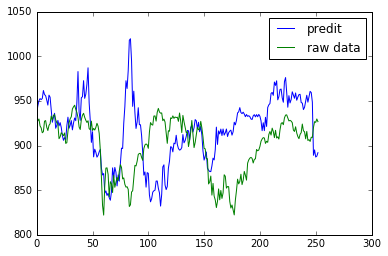

In [395]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_data[N_recent:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=10000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 5.17112
learning rate:  0.0001
loss: 1.32498
learning rate:  0.0001
loss: 0.569291
learning rate:  0.0001
loss: 0.343856
learning rate:  0.0001
loss: 0.219043
learning rate:  0.0001
loss: 0.133962
learning rate:  0.0001
loss: 0.0765292
learning rate:  0.0001
loss: 0.0398647
learning rate:  0.0001
loss: 0.01837
learning rate:  0.0001
loss: 0.00718799
learning rate:  0.0001
pretraining for layer1
loss: 2.00456
learning rate:  0.0001
loss: 0.363826
learning rate:  0.0001
loss: 0.0944738
learning rate:  0.0001
loss: 0.0211749
learning rate:  0.0001
loss: 0.0059169
learning rate:  0.0001
loss: 0.001776
learning rate:  0.0001
loss: 0.000492629
learning rate:  0.0001
loss: 0.000191979
learning rate:  0.0001
loss: 0.00010733
learning rate:  0.0001
loss: 5.05139e-05
learning rate:  0.0001
regression loss: 0.000255267
Model saved in file: /jupyter/tomoaki/pretrain.ckpt
pretrained parameters restored.
loss: 0.

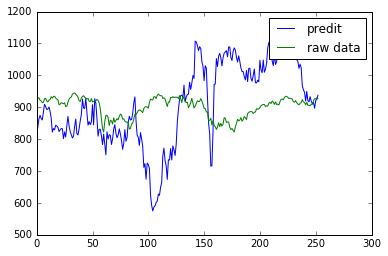

In [341]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_tilde[N_recent:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.3 * n_in)
n_hidden2 = int(0.3 * n_hidden1)
n_hidden3 = int(0.3 * n_hidden2)
n_out = 1
n_batch=10

mlp = MLP5(layers=[n_in, n_hidden1, n_hidden2, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=100000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(np.max(target_data) * pred, label="predit")
plt.plot(np.max(target_data) * target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))

plt.legend()

start!
learning_time: 0.00769996643066


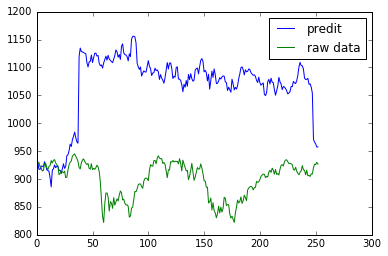

In [337]:
N = int(len(input_data) * 0.5)

N_recent = int(N * 0.25)
input_train = input_data[N_recent:N]
target_train = target_data[N_recent:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.2 * n_in)
n_out = 1
n_batch=20

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

print ("start!")
st_s = time.time()
clf.fit(input_train, target_train)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = clf.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")

# plt.ylim(min(target_pred), max(target_pred))

plt.legend()

loss: 186.803831875


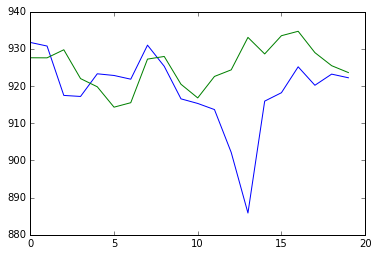

In [339]:
plt.plot(pred[:20], label="predit")
plt.plot(target_pred[:20], label="raw data")
print ("loss:", np.mean(np.square(pred[:20] - target_pred[:20])))

# LSTM

In [363]:
class VanillaLSTM(object):
    
    def __init__(self, layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla LSTM
        
        Args:
            layers (List(int)): each element should be the number of components
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def batch_normalization(self, input,gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_data, self.layers[-1]])
        
        # normalization
        self.gamma_in = tf.Variable(tf.constant(1.0, shape=[self.layers[0]]))
        self.beta_in = tf.Variable(tf.constant(0.0, shape=[self.layers[0]]))
        input_normalized = self.batch_normalization(self._input, self.gamma_in, self.beta_in)
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, input_normalized))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
        
        # reshape for training
        target_split = tf.pack(tf.split(0, n_batch, self._target))
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(target_split[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        # the name of variable scope will be layer0, layer1, ...
        x = input_tilde
        with tf.variable_scope("hidden"):
            # build LSTM graph for each layer
            self._cell = tf.nn.rnn_cell.BasicLSTMCell(self.layers[1])
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            self.W = self.weight_variable([n_in, n_out])
            self.b = self.bias_variable([n_out])
            self.cell_outputs = tf.concat(0, cell_outputs)
            
            # normalization for output
            # self.gamma_out = tf.Variable(tf.constant(1.0, shape=shape))
            # self.beta_out = tf.Variable(tf.constant(0.0, shape=shape))
            z = tf.matmul(self.cell_outputs, self.W) + self.b
            #z_normalized = self.batch_normalization(z, self.gamma_out, self.beta_out)
            #x = self.activation(z_normalized)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        input_normalized = self.batch_normalization(self._input_pred, self.gamma_in, self.beta_in)
        input_tilde = tf.split(0, n_data, input_normalized)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            
            # initialize output weight
            input_value = self.cell_outputs.eval(session=sess, 
                                                                         feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W.assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b.assign(regr.intercept_)
            sess.run(assign_op)

            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

start!
loss: 8492.65
learning rate: 0.01
loss: 0.473726
learning rate: 0.00904382075009
loss: 0.0331349
learning rate: 0.00817906937597
loss: 0.0179951
learning rate: 0.00739700373388
loss: 0.00325261
learning rate: 0.0066897175857
loss: 0.000977672
learning rate: 0.00605006067138
loss: 0.00599666
learning rate: 0.00547156642391
loss: 0.212804
learning rate: 0.004948386596
loss: 0.00251012
learning rate: 0.00447523213764
loss: 0.331568
learning rate: 0.00404731972678
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 103.211112022
Model restored.
loss: 1776.61709


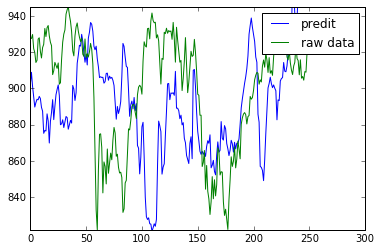

In [364]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20

lstm = VanillaLSTM(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.99,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.000628216
learning rate: 0.0001
loss: 4.91089e-06
learning rate: 9.04382075009e-05
loss: 1.00555e-06
learning rate: 8.17906937597e-05
loss: 1.76915e-07
learning rate: 7.39700373388e-05
loss: 3.09607e-08
learning rate: 6.6897175857e-05
loss: 2.67397e-08
learning rate: 6.05006067138e-05
loss: 2.03877e-09
learning rate: 5.47156642391e-05
loss: 1.12763e-08
learning rate: 4.948386596e-05
loss: 2.13236e-10
learning rate: 4.47523213764e-05
loss: 3.04057e-09
learning rate: 4.04731972678e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 131.856167078
Model restored.
loss: 0.0108495611631


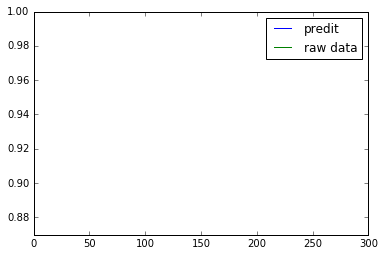

In [397]:
N = int(len(input_data) * 0.5)
target_max =  np.max(target_data)
target_tilde = target_data /target_max

input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20

lstm = VanillaLSTM(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=0.99,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(target_max * pred, label="predit")
plt.plot(target_max * target_pred, label="raw data")

plt.legend()

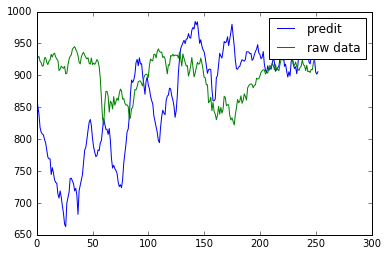

In [399]:
plt.plot(target_max * pred, label="predit")
plt.plot(target_max * target_pred, label="raw data")

plt.legend()

In [370]:
class GridLSTM(object):
    
    def __init__(self, n_in, n_hidden, n_out, n_layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Grid LSTM
        
        Args:
            n_in, n_hidden, n_out (int): the number of nodes of each layer
            n_layers (int): the number of hidden layers. 
                the shape of the network will be [n_in, n_hidden * n_layers, n_out]
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.n_in = n_in
        self.n_hidden = n_hidden
        self.n_out = n_out 
        self.n_layers = n_layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def batch_normalization(self, input,gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
        
    def build_model(self, n_data, length):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.n_in])
        self._target = tf.placeholder(tf.float32, [n_data, self.n_out])
        
        # normalization
        self.gamma_in = tf.Variable(tf.constant(1.0, shape=[self.n_in]))
        self.beta_in = tf.Variable(tf.constant(0.0, shape=[self.n_in]))
        input_normalized = self.batch_normalization(self._input, self.gamma_in, self.beta_in)
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        n_batch = int(n_data / length)
        input_split = tf.pack(tf.split(0, n_batch, input_normalized))
        input_tilde = []
        for i in xrange(length):
            input_tilde.append(input_split[:, i, :])
            
        # reshape for training
        target_split = tf.pack(tf.split(0, n_batch, self._target))
        target_tilde = []
        for i in xrange(length):
            target_tilde.append(target_split[:, i, :])
        target_tilde = tf.concat(0, target_tilde)
        
        x = input_tilde
        # build LSTM graph
        with tf.variable_scope("hidden"):
            cell = tf.contrib.grid_rnn.Grid2BasicLSTMCell(self.n_hidden)
            self._cell = tf.nn.rnn_cell.MultiRNNCell([cell] * self.n_layers)
            self._initial_state = self._cell.zero_state(n_batch, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            self.W = self.weight_variable([self.n_hidden, self.n_out])
            self.b = self.bias_variable([self.n_out])
            self.cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(self.cell_outputs, self.W) + self.b
            x = self.activation(z)
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - target_tilde))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.n_in])
        input_normalized = self.batch_normalization(self._input_pred, self.gamma_in, self.beta_in)
        input_tilde = tf.split(0, n_data, input_normalized)
        
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        n_batch = int(n_data / length)
        n_data_tilde = length * n_batch
        self.build_model(n_data_tilde, length)
        
        # we'll use only recent n_batch * n_split data 
        # because of garph's architechture
        input_data = input_data[n_data - n_data_tilde:]
        target_data = target_data[n_data - n_data_tilde:]
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            
            # initialize output weight
            input_value = self.cell_outputs.eval(session=sess, 
                                                                         feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W.assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b.assign(regr.intercept_)
            sess.run(assign_op)
            
            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

start!
loss: 251633.0
learning rate: 0.01
loss: 1.71452
learning rate: 0.00904382075009
loss: 0.284731
learning rate: 0.00817906937597
loss: 0.237719
learning rate: 0.00739700373388
loss: 0.0274044
learning rate: 0.0066897175857
loss: 0.00346356
learning rate: 0.00605006067138
loss: 0.00858841
learning rate: 0.00547156642391
loss: 0.031184
learning rate: 0.004948386596
loss: 4.90888
learning rate: 0.00447523213764
loss: 10.272
learning rate: 0.00404731972678
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 570.75466609
Model restored.
loss: 4894.95719042


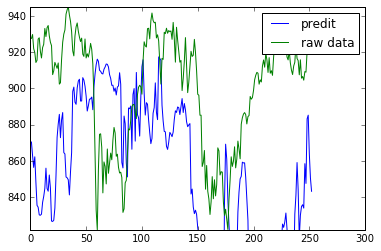

In [371]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20
n_layers = 3

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100, decay_rate=0.99,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 0.000564018
learning rate: 0.0001
loss: 3.32995e-06
learning rate: 9.04382075009e-05
loss: 4.02761e-07
learning rate: 8.17906937597e-05
loss: 4.19874e-08
learning rate: 7.39700373388e-05
loss: 4.72977e-09
learning rate: 6.6897175857e-05
loss: 5.2828e-10
learning rate: 6.05006067138e-05
loss: 3.19739e-08
learning rate: 5.47156642391e-05
loss: 5.3487e-12
learning rate: 4.948386596e-05
loss: 1.17057e-11
learning rate: 4.47523213764e-05
loss: 5.55718e-13
learning rate: 4.04731972678e-05
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 566.564467907
Model restored.
loss: 0.00287943799096


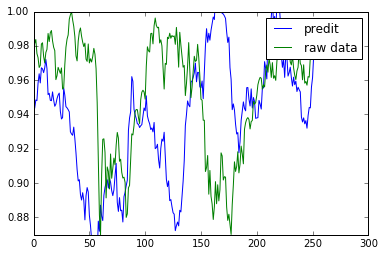

In [401]:
N = int(len(input_data) * 0.5)
target_max =  np.max(target_data)
target_tilde = target_data /target_max

input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20
n_layers = 3

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=0.99,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

In [387]:
class VanillaLSTM2(object):
    
    def __init__(self, layers, activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla LSTM
        
        Args:
            layers (List(int)): each element should be the number of components
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()  
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
    
    def batch_normalization(self, input,gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
        
    def build_model(self, n_data):
        # build model for trainig
        self._input = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        self._target = tf.placeholder(tf.float32, [n_data, self.layers[-1]])
        
        # normalization
        self.gamma_in = tf.Variable(tf.constant(1.0, shape=[self.layers[0]]))
        self.beta_in = tf.Variable(tf.constant(0.0, shape=[self.layers[0]]))
        input_normalized = self.batch_normalization(self._input, self.gamma_in, self.beta_in)
        
        # when learning, we will split data which has shape (T, dim)
        # into (n_batch, dim) * (length)
        input_normalized = tf.reshape(input_normalized, [n_data, 1, self.layers[0]])
        input_tilde = tf.unpack(input_normalized)
        
        # the name of variable scope will be layer0, layer1, ...
        x = input_tilde
        with tf.variable_scope("hidden"):
            # build LSTM graph for each layer
            self._cell = tf.nn.rnn_cell.BasicLSTMCell(self.layers[1])
            self._initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=self._initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            self.W = self.weight_variable([n_in, n_out])
            self.b = self.bias_variable([n_out])
            self.cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(self.cell_outputs, self.W) + self.b
        
        # we will not apply activation function for the last layer
        self._output = z  
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        self.train = optimizer.minimize(self.loss) 
        
    def build_pred_model(self, n_data):
        # build model for trainig
        self._input_pred = tf.placeholder(tf.float32, [n_data, self.layers[0]])
        input_normalized = self.batch_normalization(self._input_pred, self.gamma_in, self.beta_in)
        input_normalized = tf.reshape(input_normalized, [n_data, 1, self.layers[0]])
        input_tilde = tf.unpack(input_normalized)
        # the name of variable scope will be layer0, layer1, ...
        x= input_tilde
        with tf.variable_scope("hidden", reuse=True):
            # build LSTM graph for prediction
            initial_state = self._cell.zero_state(1, tf.float32)
            cell_outputs, state = tf.nn.rnn(
                cell=self._cell, 
                inputs=x, 
                initial_state=initial_state
            )
            self._final_state = state
            n_in = self.layers[1]
            n_out = self.layers[2]
            cell_outputs = tf.concat(0, cell_outputs)
            z = tf.matmul(cell_outputs, self.W) + self.b
            x = self.activation(z)
      
        # we will not apply activation function for the last layer
        self._output_pred = z  
        
    
    def training(self, input_data, target_data, length=20, n_epochs=100,
                         learning_rate=1e-8, decay_rate=0.5, decay_freq=100):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        # build training graph
        self.build_model(n_data)
        
        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            
            # initialize output weight
            input_value = self.cell_outputs.eval(session=sess, 
                                                                         feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W.assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b.assign(regr.intercept_)
            sess.run(assign_op)

            for epoch in xrange(n_epochs):
                # np.random.shuffle(batch_index)
                sess.run(self.train, 
                                feed_dict={self._input: input_data,
                                                     self._target: target_data,
                                                     self._learning_rate: learning_rate})
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))     
                    print ("learning rate:", learning_rate)
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        n_data = len(input_data)
        self.build_pred_model(n_data)
        saver = tf.train.Saver()
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output_pred.eval(session=sess,
                                                           feed_dict={self._input_pred: input_data})
        return output    

start!
loss: 1142.48
learning rate: 0.01
loss: 0.124039
learning rate: 0.00904382075009
loss: 0.0407143
learning rate: 0.00817906937597
loss: 0.00166418
learning rate: 0.00739700373388
loss: 0.00680368
learning rate: 0.0066897175857
loss: 6.93251e-05
learning rate: 0.00605006067138
loss: 0.0043415
learning rate: 0.00547156642391
loss: 0.236207
learning rate: 0.004948386596
loss: 4.0149e-05
learning rate: 0.00447523213764
loss: 0.0601063
learning rate: 0.00404731972678
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 789.707716942
Model restored.
loss: 2096.6511748


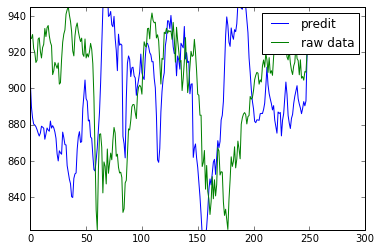

In [388]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20

lstm = VanillaLSTM2(layers=[n_in, n_hidden1, n_out], is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-2, decay_freq=100,
                      decay_rate=0.99, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

start!
loss: 4157.84
learning rate: 0.001
loss: 0.42998
learning rate: 0.000904382075009
loss: 0.484166
learning rate: 0.000817906937597
loss: 0.000957796
learning rate: 0.000739700373388
loss: 0.217334
learning rate: 0.00066897175857
loss: 0.00583534
learning rate: 0.000605006067138
loss: 0.0907042
learning rate: 0.000547156642391
loss: 0.0116758
learning rate: 0.0004948386596
loss: 0.0337896
learning rate: 0.000447523213764
loss: 0.0109405
learning rate: 0.000404731972678
Model saved in file: /jupyter/tomoaki/model.ckpt
learning_time: 573.560916901
Model restored.
loss: 2383.84655921


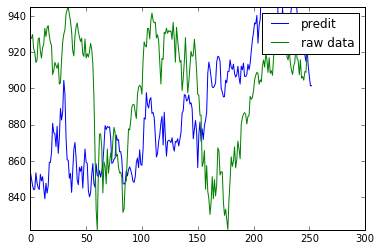

In [389]:
N = int(len(input_data) * 0.5)

input_train = input_data[:N]
target_train = target_data[:N]
input_pred = input_data[N:]
target_pred = target_data[N:]
n_in = len(input_train[0])
n_hidden = int(0.3 * n_in)
n_out = 1
length=20
n_layers = 3

lstm = GridLSTM(n_in, n_hidden, n_out, n_layers, is_initialize=True)


print ("start!")
st_s = time.time()
lstm.training(input_train, target_train,
                      learning_rate=1e-3, decay_freq=100, decay_rate=0.99,
                      length=length, n_epochs=10000)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = lstm.predict(input_pred)
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
plt.ylim(min(target_pred), max(target_pred))

plt.legend()

we will optimize final layer by regression.

In [308]:
from sklearn.linear_model import LinearRegression


class MLP6(object):
    
    def __init__(self, layers, n_batch=None,
                           activation=tf.sigmoid, is_initialize=True):
        """Initialize Vanilla Multi Layer Perceptron
        
        Args:
            layers (List(int)): each element should be the number of components
            n_batch(optional) (int): batch size for traning
            is_initialized(bool): if this variable is True, glaph will be initialized
        """
        self.layers = layers
        self.activation = activation
        
        if is_initialize is True:
            sess =tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._input = tf.placeholder(tf.float32, [n_batch, self.layers[0]], name="input")
        self._target = tf.placeholder(tf.float32, [n_batch, self.layers[-1]], name="target")
        
        # normalization for input
        shape = [self.layers[0]]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
                
        self.normalized_input = self.batch_normalization(self._input, shape, gamma, beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        x = self.normalized_input
        for i_layer in xrange(len(self.layers) - 1):
            with tf.variable_scope("layer%d" % i_layer):
                n_in = self.layers[i_layer]
                n_out = self.layers[i_layer + 1]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
                
            # we will not apply activation function for the last layer
            if i_layer == len(self.layers) - 2:
                # we will keep hidden node for regression
                self.hidden = x
                self._output = z
            else:
                shape = [self.layers[i_layer + 1]]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self._output - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)   
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input, shape, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input, [0])
        return gamma * (input - mean) / tf.sqrt(variance + eps) + beta
    
    def pre_train(self, input_data, target_data,
                            learning_rate=1e-2, n_batch=20, 
                            n_epochs=100, decay_rate=0.9, decay_freq=100):
        
        print ("starg pretraining")
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        n_layer = len(self.W_list)
        inpt = self.normalized_input
        
        # we will not use bias for pretraining
        print ("building graph...")
        trains = []
        losses = []
        for i_layer in xrange(len(self.layers) - 2):
            with tf.variable_scope("layer%d" % i_layer, reuse=True):
                W = self.W_list[i_layer]
                beta = self.beta_list[i_layer + 1]
                gamma = self.gamma_list[i_layer + 1]
                z_normalized = self.batch_normalization(
                    tf.matmul(inpt, W), 
                    shape=self.layers[i_layer + 1],
                    gamma=gamma,
                    beta=beta
                )
                u = self.activation(z_normalized)
                inpt_tilde = tf.matmul(u, tf.transpose(W))
                
                # training graph
                loss_auto = tf.reduce_mean(tf.square(inpt_tilde - inpt))
                losses.append(loss_auto)
                train_auto = self.optimizer.minimize(loss_auto)   
                trains.append(train_auto)
                    
            # next layer's input
            inpt = u
        
        # we will use this for the last layer's pretraining
        last_input = inpt
        
        print ("pretraining....")
        init_op = tf.initialize_all_variables()
        with tf.Session() as sess:
            sess.run(init_op)
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)  # index for shuffling
            for i_layer in xrange(n_layer - 1):
                print ("pretraining for layer%d" % i_layer)
                lr = learning_rate
                for epoch in xrange(n_epochs):
                    np.random.shuffle(batch_index)
                    for idx in iter(batch_index):
                        beg = idx * n_batch
                        end = (idx + 1) * n_batch 
                        batch_input = input_data[beg:end]
                        batch_target = target_data[beg:end]
                        sess.run(trains[i_layer], 
                                        feed_dict={self._input: batch_input,
                                                             self._learning_rate: lr})
                    
                    if (epoch + 1) % decay_freq == 0:
                        lr *= decay_rate
                    
                    if epoch % print_freq == 0:
                        print ("loss:", losses[i_layer].eval(session=sess, 
                                                                                   feed_dict={self._input: input_data}))  
                        print ("learning rate: ", lr)
                
            # for the last layer we will use regression as a pretraining
            input_value = last_input.eval(session=sess, 
                                                                feed_dict={self._input: input_data})
            regr = LinearRegression()
            regr.fit(input_value, target_data)
            # assign optimal values for each parameter
            assign_op = self.W_list[-1].assign(regr.coef_.T)
            sess.run(assign_op)
            assign_op = self.b_list[-1].assign(regr.intercept_)
            sess.run(assign_op)
            print ("regression loss:", self.loss.eval(session=sess, 
                                                                                   feed_dict={self._input: input_data,
                                                                                                        self._target: target_data}))
             
            saver = tf.train.Saver()   
            save_path = saver.save(sess, "/jupyter/tomoaki/pretrain.ckpt")
            print("Model saved in file: %s" % save_path)
            
    
    def training(self, input_data, target_data, n_batch=20, n_epochs=1000,
                         learning_rate=1e-8, pre_n_epochs=1000, pre_learning_rate=1e-8, decay_rate=0.5, decay_freq=100, is_pretrain=True):
        n_data = len(input_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver(tf.all_variables())

        with tf.Session() as sess:
            if is_pretrain is True:
                self.pre_train(input_data, target_data, n_batch=n_batch,
                                         learning_rate=pre_learning_rate, n_epochs=pre_n_epochs, 
                                         decay_rate=decay_rate, decay_freq=decay_freq)
                saver.restore(sess, "/jupyter/tomoaki/pretrain.ckpt")
                print("pretrained parameters restored.")
            else:
                sess.run(init_op)
                
            n_iter = int(n_data / n_batch)
            batch_index = np.arange(n_iter - 1)   # index of data for shuffling
            for epoch in xrange(n_epochs):
                np.random.shuffle(batch_index)
                for idx in iter(batch_index):
                    beg = idx * n_batch
                    end = (idx + 1) * n_batch
                    batch_input = input_data[beg:end]
                    batch_target = target_data[beg:end]
                    sess.run(self.train, 
                                    feed_dict={self._input: batch_input,
                                                         self._target: batch_target,
                                                         self._learning_rate: learning_rate})
                    
                if (epoch + 1) % decay_freq == 0:
                    learning_rate *= decay_rate
                    
                if epoch % print_freq == 0:
                    # optimize final layer with regression
                    regr = LinearRegression()
                    x_value = self.hidden.eval(session=sess, feed_dict={self._input: batch_input})
                    regr.fit(x_value, batch_target)
                    # assign optimal values for each parameter
                    assign_op = self.W_list[-1].assign(regr.coef_.T)
                    sess.run(assign_op)
                    assign_op = self.b_list[-1].assign(regr.intercept_)
                    sess.run(assign_op)
                    print ("loss:", 
                               self.loss.eval(session=sess, 
                                                      feed_dict={self._input: input_data,
                                                                           self._target: target_data}))  
                    print ("change learning rate", learning_rate)
            
            # we should define saver here to avoid keeping graphs of pretraining
            saver = tf.train.Saver(tf.all_variables())  
            save_path = saver.save(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model saved in file: %s" % save_path)
            
    def predict(self, input_data):
        saver = tf.train.Saver(tf.all_variables())
        with  tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "/jupyter/tomoaki/model.ckpt")
            print("Model restored.")
            output = self._output.eval(session=sess,
                                                           feed_dict={self._input: input_data})
        return output

start!
starg pretraining
building graph...
pretraining....
pretraining for layer0
loss: 13.1322
learning rate:  0.0001
loss: 4.4166
learning rate:  0.0001
loss: 1.7581
learning rate:  0.0001
loss: 0.856192
learning rate:  0.0001
loss: 0.512391
learning rate:  0.0001
loss: 0.360289
learning rate:  0.0001
loss: 0.269135
learning rate:  0.0001
loss: 0.201529
learning rate:  0.0001
loss: 0.14987
learning rate:  0.0001
loss: 0.110622
learning rate:  0.0001
pretraining for layer1
loss: 3.99765
learning rate:  0.0001
loss: 0.603947
learning rate:  0.0001
loss: 0.257007
learning rate:  0.0001
loss: 0.142249
learning rate:  0.0001
loss: 0.0828639
learning rate:  0.0001
loss: 0.0481297
learning rate:  0.0001
loss: 0.0273777
learning rate:  0.0001
loss: 0.015102
learning rate:  0.0001
loss: 0.00807592
learning rate:  0.0001
loss: 0.00434037
learning rate:  0.0001
pretraining for layer2
loss: 2.2474
learning rate:  0.0001
loss: 0.482804
learning rate:  0.0001
loss: 0.1894
learning rate:  0.0001
lo

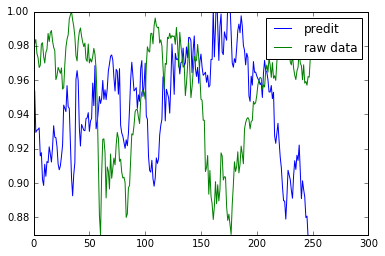

In [309]:
N = int(len(input_data) * 0.5)
target_tilde = target_data / np.max(target_data)
input_train = input_data[:N]
target_train = target_tilde[:N]
input_pred = input_data[N:]
target_pred = target_tilde[N:]
n_in = len(input_train[0])
n_hidden1 = int(0.5 * n_in)
n_hidden2 = int(0.5 * n_hidden1)
n_hidden3 = int(0.5 * n_hidden2)
n_out = 1
n_batch=20

mlp = MLP6(layers=[n_in, n_hidden1, n_hidden2, n_hidden3, n_out], is_initialize=True)

print ("start!")
st_s = time.time()
mlp.training(input_train, target_train,
                      learning_rate=1e-4, decay_freq=100, decay_rate=1.0,
                      n_batch=n_batch, n_epochs=1000, pre_n_epochs=1000,
                      pre_learning_rate=1e-4, is_pretrain=True)
elapsed_s = time.time() - st_s
print ("learning_time:",  elapsed_s)

pred = mlp.predict(input_pred)
plt.plot(pred, label="predit")
plt.plot(target_pred, label="raw data")
print ("loss:", np.mean(np.square(pred - target_pred)))
plt.ylim(min(target_pred), max(target_pred))

plt.legend()